In [1]:
import pandas as pd
import datetime
import sys, traceback
import re
import matplotlib.pyplot as plt
import time,datetime




plt.rcParams['font.sans-serif']=['DFKai-SB']
plt.rcParams['axes.unicode_minus']=False

df_list = []


arr_Student_Objects = []


file_name = "./newdata/new20170213-{}.csv"


def add_column():

    for read_index in range(1, 3):

        df = pd.read_csv(file_name.format(read_index))
        df.loc[-1] = df.columns.values
        df.index = df.index + 1  # shifting index
        df = df.sort_index()
        df.columns = ['time', 'mac', 'loc']
        df_list.append(df)

    df = pd.concat(df_list)
    df = df.reset_index(drop=True)
  
    return df

def groupby_loc(df):
    df_loc = df.groupby('loc')
    print(df_loc)  


def main():
    
    global df
    df = add_column()
    for index, row in df.iterrows():
        if(row['loc'][:5].find("_") != -1):
            row['loc'] = row['loc'][:2]
        else:
            row['loc'] = row['loc'][:5]

   
    

if __name__ == "__main__":
    main()
    print(df)

                       time                mac    loc
0       2017-02-13 23:59:57  5c:93:a2:db:ba:c7     af
1       2017-02-13 23:59:50  28:f0:76:eb:49:30     bg
2       2017-02-13 23:59:48  5c:f5:da:e9:87:c5     bg
3       2017-02-13 23:59:46  ec:35:86:c8:12:df     ab
4       2017-02-13 23:59:43  ac:37:43:e9:39:ad     bc
5       2017-02-13 23:59:43  90:cd:b6:5b:9a:d2     ah
6       2017-02-13 23:59:43  90:cd:b6:5b:9a:d2     ah
7       2017-02-13 23:59:42  9c:04:eb:ca:ed:f7     ab
8       2017-02-13 23:59:32  90:cd:b6:5b:9a:d2     ah
9       2017-02-13 23:59:32  90:cd:b6:5b:9a:d2     ah
10      2017-02-13 23:59:29  9c:04:eb:ca:ed:f7     ab
11      2017-02-13 23:59:28  c8:6f:1d:1f:20:84     ab
12      2017-02-13 23:59:27  c8:6f:1d:1f:20:84     ab
13      2017-02-13 23:59:22  c8:6f:1d:1f:20:84     ab
14      2017-02-13 23:59:18  30:f7:72:20:e3:21     ab
15      2017-02-13 23:59:18  30:f7:72:20:e3:21     ab
16      2017-02-13 23:59:13  90:cd:b6:5b:9a:d2     ah
17      2017-02-13 23:59:13 

In [2]:
grouped = df.groupby(['mac','loc']).size().reset_index()
grouped.columns = ['mac', 'dep', 'aces']
grouped = grouped.drop(grouped[(grouped['dep']=='bdorm') | (grouped['dep']=='gdorm') | (grouped['dep']=='bh') | (grouped['dep']=='cb') | (grouped['dep']=='bk')].index)
grouped = grouped.reset_index(drop=True)
grouped 

,mac,dep,aces
0,00:02:72:de:59:ab,ad,15
1,00:08:22:1a:d9:43,aa,2
2,00:08:22:1a:d9:43,ab,4
3,00:08:22:1a:d9:43,ba,4
4,00:08:22:38:88:6c,af,2
5,00:08:22:52:1b:fc,ab,4
6,00:08:22:52:1b:fc,bg,22
7,00:08:22:8e:51:75,af,14
8,00:08:22:dc:28:00,ad,20
9,00:08:22:dc:28:00,ae,2


In [3]:
user = list()
real_user = list()
user = list(set(grouped['mac']))
user

['60:f4:45:e2:cd:04',
 '60:f8:1d:d9:68:9d',
 '0c:d7:46:3f:b3:a6',
 '40:b8:37:c7:d4:8c',
 'c8:38:70:a3:38:87',
 '84:38:35:59:dd:96',
 '64:27:37:aa:bc:13',
 'b0:9f:ba:ed:bf:b0',
 '00:27:15:11:00:22',
 '70:14:a6:40:17:b1',
 'f0:79:59:41:39:df',
 '8c:8e:f2:9b:38:6c',
 '08:6d:41:b9:25:40',
 '5c:96:9d:78:6b:63',
 'e0:66:78:b7:7e:1a',
 'dc:37:14:89:6b:ca',
 '1c:91:48:09:91:e7',
 '80:01:84:d6:a6:09',
 '00:ee:bd:b8:74:8c',
 'b8:76:3f:44:d5:99',
 'c8:1e:e7:3c:fb:ff',
 '4c:0b:be:03:1a:d0',
 '30:75:12:81:e0:74',
 'f4:e3:fb:c4:c1:12',
 '64:cc:2e:a3:e4:f1',
 '2c:56:dc:b4:bf:fc',
 '70:14:a6:21:5d:ad',
 'e0:c7:67:de:d6:19',
 'ec:55:f9:2d:8f:7d',
 '40:f0:2f:09:2f:fb',
 'e4:47:90:ca:0e:4b',
 '48:db:50:9c:44:ef',
 '48:5a:3f:07:e5:8e',
 '68:df:dd:64:21:19',
 '98:e7:9a:3d:53:78',
 'f0:79:59:22:fd:7b',
 '34:a3:95:75:7c:3f',
 '70:4d:7b:4a:1a:8e',
 '60:f8:1d:04:26:2d',
 '1c:99:4c:b0:0c:45',
 '80:7a:bf:5d:00:fc',
 '70:81:eb:78:46:57',
 '48:3b:38:56:c1:50',
 '2c:33:61:52:88:9c',
 '28:e1:4c:dc:0f:c3',
 'bc:3a:ea

In [4]:
list_loc = list()
list_del = list()
for user_index in range(len(user)):
    df_grouped = grouped[grouped['mac'] == user[user_index]].reset_index(drop=True)
    print(user[user_index])
    print(df_grouped)
    if(len(df_grouped) == 1):
        list_loc.append(df_grouped.loc[0].dep)
        print(df_grouped.dep)
    else:   
        for df_grouped_index, row in df_grouped.iterrows():
            if(df_grouped_index == 0):
                sec_MAX = 0
                MAX = df_grouped.loc[df_grouped_index].aces
                MAX_index = df_grouped_index
            else:
                print(len(df_grouped), ":", df_grouped_index)
                if(df_grouped.loc[df_grouped_index].aces > MAX):
                    MAX = df_grouped.loc[df_grouped_index].aces
                    MAX_index = df_grouped_index
                    print("MAX",":",MAX)
                elif(df_grouped.loc[df_grouped_index].aces == MAX):
                    sec_MAX = df_grouped.loc[df_grouped_index].aces
                if(len(df_grouped) == df_grouped_index + 1):
                    print("MAX",":",MAX, "sec_MAX",":",sec_MAX)
                    if(sec_MAX == MAX):
                        print("hi")
                        list_del.append(user_index)
                    else:
                        print("hey")
                        list_loc.append(df_grouped.loc[MAX_index].dep)
                        print(df_grouped.loc[MAX_index].dep)



60:f4:45:e2:cd:04
                 mac dep  aces
0  60:f4:45:e2:cd:04  ac    29
1  60:f4:45:e2:cd:04  bd     4
2  60:f4:45:e2:cd:04  bg   304
3 : 1
3 : 2
MAX : 304
MAX : 304 sec_MAX : 0
hey
bg
60:f8:1d:d9:68:9d
                 mac dep  aces
0  60:f8:1d:d9:68:9d  aa     3
1  60:f8:1d:d9:68:9d  ab    10
2  60:f8:1d:d9:68:9d  ad    12
3  60:f8:1d:d9:68:9d  ba     9
4  60:f8:1d:d9:68:9d  bb     5
5  60:f8:1d:d9:68:9d  be    11
6  60:f8:1d:d9:68:9d  bi     3
7  60:f8:1d:d9:68:9d  bj    13
8 : 1
MAX : 10
8 : 2
MAX : 12
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 13
MAX : 13 sec_MAX : 0
hey
bj
0c:d7:46:3f:b3:a6
                 mac dep  aces
0  0c:d7:46:3f:b3:a6  aa   131
1  0c:d7:46:3f:b3:a6  ab    13
2  0c:d7:46:3f:b3:a6  ba    20
3 : 1
3 : 2
MAX : 131 sec_MAX : 0
hey
aa
40:b8:37:c7:d4:8c
                 mac dep  aces
0  40:b8:37:c7:d4:8c  bg     8
0    bg
Name: dep, dtype: object
c8:38:70:a3:38:87
                 mac dep  aces
0  c8:38:70:a3:38:87  bg     3
0    bg
Name: dep, dtype: object
84:3

                 mac dep  aces
0  64:a5:c3:88:b5:bf  aa     3
1  64:a5:c3:88:b5:bf  ab     4
2  64:a5:c3:88:b5:bf  ae    58
3  64:a5:c3:88:b5:bf  ba     2
4  64:a5:c3:88:b5:bf  bd     4
5  64:a5:c3:88:b5:bf  bg    11
6 : 1
MAX : 4
6 : 2
MAX : 58
6 : 3
6 : 4
6 : 5
MAX : 58 sec_MAX : 0
hey
ae
e8:d4:e0:91:58:58
                 mac dep  aces
0  e8:d4:e0:91:58:58  zk     3
0    zk
Name: dep, dtype: object
bc:3a:ea:50:a2:bb
                 mac dep  aces
0  bc:3a:ea:50:a2:bb  ac     4
1  bc:3a:ea:50:a2:bb  ad   157
2  bc:3a:ea:50:a2:bb  ae     3
3  bc:3a:ea:50:a2:bb  af    95
4  bc:3a:ea:50:a2:bb  ah    31
5  bc:3a:ea:50:a2:bb  bb    11
6  bc:3a:ea:50:a2:bb  bd     4
7  bc:3a:ea:50:a2:bb  be    40
8  bc:3a:ea:50:a2:bb  bg    18
9  bc:3a:ea:50:a2:bb  bw    12
10 : 1
MAX : 157
10 : 2
10 : 3
10 : 4
10 : 5
10 : 6
10 : 7
10 : 8
10 : 9
MAX : 157 sec_MAX : 0
hey
ad
f8:32:e4:35:b6:2d
                 mac dep  aces
0  f8:32:e4:35:b6:2d  aa     2
1  f8:32:e4:35:b6:2d  ad    28
2  f8:32:e4:35:b6:2d  a

                 mac dep  aces
0  c4:9a:02:2f:44:5d  ac    14
1  c4:9a:02:2f:44:5d  ad    17
2  c4:9a:02:2f:44:5d  bd     4
3  c4:9a:02:2f:44:5d  bg    71
4 : 1
MAX : 17
4 : 2
4 : 3
MAX : 71
MAX : 71 sec_MAX : 0
hey
bg
74:2f:68:e4:b0:2d
                 mac dep  aces
0  74:2f:68:e4:b0:2d  bn     3
0    bn
Name: dep, dtype: object
b4:ce:f6:4f:76:c8
                 mac dep  aces
0  b4:ce:f6:4f:76:c8  bg     6
0    bg
Name: dep, dtype: object
04:52:f3:8e:df:37
                 mac dep  aces
0  04:52:f3:8e:df:37  bn   501
0    bn
Name: dep, dtype: object
98:4b:4a:bd:d3:eb
                 mac dep  aces
0  98:4b:4a:bd:d3:eb  bg     4
0    bg
Name: dep, dtype: object
58:40:4e:16:31:46
                 mac dep  aces
0  58:40:4e:16:31:46  ad    15
1  58:40:4e:16:31:46  ah     4
2 : 1
MAX : 15 sec_MAX : 0
hey
ad
48:3b:38:73:cc:ec
                 mac dep  aces
0  48:3b:38:73:cc:ec  bn     4
0    bn
Name: dep, dtype: object
2c:8a:72:bb:c1:e7
                 mac dep  aces
0  2c:8a:72:bb:c1:e7  

                  mac dep  aces
0   cc:29:f5:7e:2c:a2  aa     8
1   cc:29:f5:7e:2c:a2  ab   159
2   cc:29:f5:7e:2c:a2  ac     2
3   cc:29:f5:7e:2c:a2  ad     5
4   cc:29:f5:7e:2c:a2  af    22
5   cc:29:f5:7e:2c:a2  ah    90
6   cc:29:f5:7e:2c:a2  ba    11
7   cc:29:f5:7e:2c:a2  bb     4
8   cc:29:f5:7e:2c:a2  be    13
9   cc:29:f5:7e:2c:a2  bi    17
10  cc:29:f5:7e:2c:a2  bj    18
11 : 1
MAX : 159
11 : 2
11 : 3
11 : 4
11 : 5
11 : 6
11 : 7
11 : 8
11 : 9
11 : 10
MAX : 159 sec_MAX : 0
hey
ab
74:51:ba:e4:07:ae
                 mac dep  aces
0  74:51:ba:e4:07:ae  af     5
1  74:51:ba:e4:07:ae  ah    79
2  74:51:ba:e4:07:ae  ba     2
3  74:51:ba:e4:07:ae  bg     2
4  74:51:ba:e4:07:ae  bj     6
5 : 1
MAX : 79
5 : 2
5 : 3
5 : 4
MAX : 79 sec_MAX : 0
hey
ah
00:88:65:bf:4c:59
                 mac dep  aces
0  00:88:65:bf:4c:59  ah    16
1  00:88:65:bf:4c:59  be     2
2  00:88:65:bf:4c:59  bj     3
3 : 1
3 : 2
MAX : 16 sec_MAX : 0
hey
ah
c0:9f:05:4a:a9:e1
                 mac dep  aces
0  c0:9f:0

                 mac dep  aces
0  f8:32:e4:62:d9:c7  ab     4
0    ab
Name: dep, dtype: object
b4:52:7e:8f:d8:15
                  mac dep  aces
0   b4:52:7e:8f:d8:15  aa     2
1   b4:52:7e:8f:d8:15  ab     4
2   b4:52:7e:8f:d8:15  ad    30
3   b4:52:7e:8f:d8:15  ae     6
4   b4:52:7e:8f:d8:15  af   137
5   b4:52:7e:8f:d8:15  ah     5
6   b4:52:7e:8f:d8:15  ba    11
7   b4:52:7e:8f:d8:15  bb     8
8   b4:52:7e:8f:d8:15  bd     4
9   b4:52:7e:8f:d8:15  be     9
10  b4:52:7e:8f:d8:15  bg    33
11  b4:52:7e:8f:d8:15  bi     9
12  b4:52:7e:8f:d8:15  bm     9
13  b4:52:7e:8f:d8:15  bn     8
14 : 1
MAX : 4
14 : 2
MAX : 30
14 : 3
14 : 4
MAX : 137
14 : 5
14 : 6
14 : 7
14 : 8
14 : 9
14 : 10
14 : 11
14 : 12
14 : 13
MAX : 137 sec_MAX : 0
hey
af
d8:5d:e2:d2:49:bb
                 mac dep  aces
0  d8:5d:e2:d2:49:bb  ab    36
0    ab
Name: dep, dtype: object
f0:79:59:21:80:0a
                 mac dep  aces
0  f0:79:59:21:80:0a  aa     8
1  f0:79:59:21:80:0a  ab     2
2  f0:79:59:21:80:0a  ba     3
3

                 mac dep  aces
0  04:c2:3e:71:ab:12  af     7
1  04:c2:3e:71:ab:12  bg     5
2 : 1
MAX : 7 sec_MAX : 0
hey
af
e8:50:8b:67:ec:50
                 mac dep  aces
0  e8:50:8b:67:ec:50  ab     4
1  e8:50:8b:67:ec:50  ac     2
2  e8:50:8b:67:ec:50  ba    12
3  e8:50:8b:67:ec:50  bc     2
4  e8:50:8b:67:ec:50  bg    10
5 : 1
5 : 2
MAX : 12
5 : 3
5 : 4
MAX : 12 sec_MAX : 0
hey
ba
70:56:81:93:37:69
                 mac dep  aces
0  70:56:81:93:37:69  ah    39
0    ah
Name: dep, dtype: object
c4:3a:be:66:38:dd
                 mac dep  aces
0  c4:3a:be:66:38:dd  ae     2
1  c4:3a:be:66:38:dd  af    14
2  c4:3a:be:66:38:dd  ba     6
3  c4:3a:be:66:38:dd  bb     4
4  c4:3a:be:66:38:dd  bn     2
5  c4:3a:be:66:38:dd  bw     2
6 : 1
MAX : 14
6 : 2
6 : 3
6 : 4
6 : 5
MAX : 14 sec_MAX : 0
hey
af
f0:f6:1c:6f:f7:bb
                 mac dep  aces
0  f0:f6:1c:6f:f7:bb  af     3
1  f0:f6:1c:6f:f7:bb  ah    30
2  f0:f6:1c:6f:f7:bb  be    12
3 : 1
MAX : 30
3 : 2
MAX : 30 sec_MAX : 0
hey
ah
b4:

24:f5:aa:6e:23:51
                 mac dep  aces
0  24:f5:aa:6e:23:51  be     6
0    be
Name: dep, dtype: object
84:ef:18:95:fb:64
                 mac dep  aces
0  84:ef:18:95:fb:64  ah    26
0    ah
Name: dep, dtype: object
7c:b0:c2:80:ee:a4
                 mac dep  aces
0  7c:b0:c2:80:ee:a4  bd    21
0    bd
Name: dep, dtype: object
10:41:7f:9e:ce:6d
                 mac dep  aces
0  10:41:7f:9e:ce:6d  ad    17
1  10:41:7f:9e:ce:6d  bm     3
2 : 1
MAX : 17 sec_MAX : 0
hey
ad
6c:71:d9:db:c0:47
                 mac dep  aces
0  6c:71:d9:db:c0:47  ab   164
0    ab
Name: dep, dtype: object
18:59:36:33:31:e1
                 mac dep  aces
0  18:59:36:33:31:e1  bw     6
0    bw
Name: dep, dtype: object
54:72:4f:2a:93:f4
                 mac dep  aces
0  54:72:4f:2a:93:f4  aa     4
1  54:72:4f:2a:93:f4  ab   169
2  54:72:4f:2a:93:f4  ba    11
3  54:72:4f:2a:93:f4  bb     6
4  54:72:4f:2a:93:f4  bi     7
5 : 1
MAX : 169
5 : 2
5 : 3
5 : 4
MAX : 169 sec_MAX : 0
hey
ab
0c:d7:46:1e:e1:1a
     

                 mac dep  aces
0  58:40:4e:3b:fd:14  af    13
0    af
Name: dep, dtype: object
00:26:82:b9:c8:02
                 mac dep  aces
0  00:26:82:b9:c8:02  ae    16
0    ae
Name: dep, dtype: object
cc:fa:00:b0:e3:b2
                 mac dep  aces
0  cc:fa:00:b0:e3:b2  bg     4
0    bg
Name: dep, dtype: object
30:75:12:a6:c3:7f
                 mac dep  aces
0  30:75:12:a6:c3:7f  ad    15
1  30:75:12:a6:c3:7f  ae    23
2  30:75:12:a6:c3:7f  bb     3
3  30:75:12:a6:c3:7f  bg    20
4  30:75:12:a6:c3:7f  bn     8
5 : 1
MAX : 23
5 : 2
5 : 3
5 : 4
MAX : 23 sec_MAX : 0
hey
ae
9c:fc:01:ab:0e:03
                 mac dep  aces
0  9c:fc:01:ab:0e:03  ab    28
1  9c:fc:01:ab:0e:03  ac     7
2  9c:fc:01:ab:0e:03  ad     9
3  9c:fc:01:ab:0e:03  af   166
4  9c:fc:01:ab:0e:03  ba    10
5  9c:fc:01:ab:0e:03  bb    17
6  9c:fc:01:ab:0e:03  bd     5
7  9c:fc:01:ab:0e:03  bg    38
8  9c:fc:01:ab:0e:03  bi     2
9  9c:fc:01:ab:0e:03  bn    14
10 : 1
10 : 2
10 : 3
MAX : 166
10 : 4
10 : 5
10 : 6
10 

                 mac dep  aces
0  8c:8e:f2:d7:1b:c9  aa     3
1  8c:8e:f2:d7:1b:c9  bd     3
2  8c:8e:f2:d7:1b:c9  bg     7
3 : 1
3 : 2
MAX : 7
MAX : 7 sec_MAX : 3
hey
bg
38:71:de:83:ef:ee
                 mac dep  aces
0  38:71:de:83:ef:ee  ad     3
1  38:71:de:83:ef:ee  bd    14
2  38:71:de:83:ef:ee  bm    89
3 : 1
MAX : 14
3 : 2
MAX : 89
MAX : 89 sec_MAX : 0
hey
bm
44:74:6c:b4:01:a7
                 mac dep  aces
0  44:74:6c:b4:01:a7  ab     4
1  44:74:6c:b4:01:a7  ac    12
2  44:74:6c:b4:01:a7  ae     4
3  44:74:6c:b4:01:a7  bb    32
4  44:74:6c:b4:01:a7  bc     2
5  44:74:6c:b4:01:a7  bd     4
6  44:74:6c:b4:01:a7  bg    22
7 : 1
MAX : 12
7 : 2
7 : 3
MAX : 32
7 : 4
7 : 5
7 : 6
MAX : 32 sec_MAX : 0
hey
bb
dc:85:de:94:30:cd
                 mac dep  aces
0  dc:85:de:94:30:cd  bm     6
0    bm
Name: dep, dtype: object
00:ee:bd:b9:a4:52
                 mac dep  aces
0  00:ee:bd:b9:a4:52  bd     4
0    bd
Name: dep, dtype: object
18:af:61:c7:b9:6e
                 mac dep  aces
0  18:

                 mac dep  aces
0  b4:18:d1:29:6b:29  ad     6
1  b4:18:d1:29:6b:29  ba    38
2  b4:18:d1:29:6b:29  bb     4
3  b4:18:d1:29:6b:29  bd     4
4  b4:18:d1:29:6b:29  be   205
5  b4:18:d1:29:6b:29  bg    13
6  b4:18:d1:29:6b:29  bi    12
7  b4:18:d1:29:6b:29  bj    15
8 : 1
MAX : 38
8 : 2
8 : 3
8 : 4
MAX : 205
8 : 5
8 : 6
8 : 7
MAX : 205 sec_MAX : 0
hey
be
b4:ef:39:45:2d:d3
                 mac dep  aces
0  b4:ef:39:45:2d:d3  bg     3
0    bg
Name: dep, dtype: object
38:2d:e8:40:82:14
                 mac dep  aces
0  38:2d:e8:40:82:14  bg     4
0    bg
Name: dep, dtype: object
b8:44:d9:83:ed:7c
                 mac dep  aces
0  b8:44:d9:83:ed:7c  aa   467
1  b8:44:d9:83:ed:7c  ab     4
2  b8:44:d9:83:ed:7c  ba    22
3 : 1
3 : 2
MAX : 467 sec_MAX : 0
hey
aa
40:40:a7:39:c7:75
                 mac dep  aces
0  40:40:a7:39:c7:75  bd     4
0    bd
Name: dep, dtype: object
48:43:7c:1d:85:af
                 mac dep  aces
0  48:43:7c:1d:85:af  af     2
1  48:43:7c:1d:85:af  ah    7

                 mac dep  aces
0  60:a4:d0:52:15:33  ba    26
0    ba
Name: dep, dtype: object
a4:02:b9:de:fa:17
                 mac dep  aces
0  a4:02:b9:de:fa:17  af    25
0    af
Name: dep, dtype: object
b4:b6:76:52:f3:c8
                 mac dep  aces
0  b4:b6:76:52:f3:c8  af     6
0    af
Name: dep, dtype: object
04:c2:3e:3c:6d:4f
                 mac dep  aces
0  04:c2:3e:3c:6d:4f  bg     5
0    bg
Name: dep, dtype: object
78:40:e4:9e:5d:12
                 mac dep  aces
0  78:40:e4:9e:5d:12  ah    18
0    ah
Name: dep, dtype: object
64:27:37:d3:69:67
                 mac dep  aces
0  64:27:37:d3:69:67  bc     2
1  64:27:37:d3:69:67  bg    22
2 : 1
MAX : 22
MAX : 22 sec_MAX : 0
hey
bg
dc:53:60:16:4f:59
                 mac dep  aces
0  dc:53:60:16:4f:59  be     3
0    be
Name: dep, dtype: object
58:40:4e:da:73:0f
                 mac dep  aces
0  58:40:4e:da:73:0f  ad   181
0    ad
Name: dep, dtype: object
c0:9f:05:4a:cf:70
                 mac dep  aces
0  c0:9f:05:4a:cf:70  af

7  9c:4f:da:32:41:8d  bn     2
8 : 1
8 : 2
8 : 3
MAX : 32
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 32 sec_MAX : 0
hey
af
34:36:3b:73:8c:44
                 mac dep  aces
0  34:36:3b:73:8c:44  bw    61
0    bw
Name: dep, dtype: object
d8:00:4d:e2:a0:d2
                 mac dep  aces
0  d8:00:4d:e2:a0:d2  aa     5
1  d8:00:4d:e2:a0:d2  ab    14
2  d8:00:4d:e2:a0:d2  ad     2
3  d8:00:4d:e2:a0:d2  af    16
4  d8:00:4d:e2:a0:d2  ah     4
5  d8:00:4d:e2:a0:d2  ba     6
6  d8:00:4d:e2:a0:d2  bb     2
7  d8:00:4d:e2:a0:d2  be     8
8  d8:00:4d:e2:a0:d2  bi     4
9 : 1
MAX : 14
9 : 2
9 : 3
MAX : 16
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 16 sec_MAX : 0
hey
af
d0:a6:37:a8:e0:fc
                 mac dep  aces
0  d0:a6:37:a8:e0:fc  aa     2
1  d0:a6:37:a8:e0:fc  ab    13
2  d0:a6:37:a8:e0:fc  ac     5
3  d0:a6:37:a8:e0:fc  ba    71
4  d0:a6:37:a8:e0:fc  bb     2
5  d0:a6:37:a8:e0:fc  bc     9
6  d0:a6:37:a8:e0:fc  bd     9
7  d0:a6:37:a8:e0:fc  bg    14
8 : 1
MAX : 13
8 : 2
8 : 3
MAX : 71
8 : 4
8 : 5
8 : 6
8 : 

MAX : 9
8 : 2
8 : 3
MAX : 49
8 : 4
MAX : 190
8 : 5
8 : 6
8 : 7
MAX : 190 sec_MAX : 0
hey
ba
58:48:22:ee:72:9f
                 mac dep  aces
0  58:48:22:ee:72:9f  aa     3
1  58:48:22:ee:72:9f  ab     8
2  58:48:22:ee:72:9f  ac     2
3  58:48:22:ee:72:9f  bg     4
4  58:48:22:ee:72:9f  bn    45
5 : 1
MAX : 8
5 : 2
5 : 3
5 : 4
MAX : 45
MAX : 45 sec_MAX : 0
hey
bn
70:ec:e4:55:d9:a4
                 mac dep  aces
0  70:ec:e4:55:d9:a4  ad     3
1  70:ec:e4:55:d9:a4  af     3
2  70:ec:e4:55:d9:a4  ba     2
3  70:ec:e4:55:d9:a4  be     5
4  70:ec:e4:55:d9:a4  bi     2
5 : 1
5 : 2
5 : 3
MAX : 5
5 : 4
MAX : 5 sec_MAX : 3
hey
be
c0:bd:d1:88:ed:d5
                 mac dep  aces
0  c0:bd:d1:88:ed:d5  af     2
1  c0:bd:d1:88:ed:d5  ah     4
2  c0:bd:d1:88:ed:d5  bm    47
3 : 1
MAX : 4
3 : 2
MAX : 47
MAX : 47 sec_MAX : 0
hey
bm
dc:2b:2a:be:e7:e0
                 mac dep  aces
0  dc:2b:2a:be:e7:e0  ae     4
1  dc:2b:2a:be:e7:e0  bd     4
2  dc:2b:2a:be:e7:e0  bn     8
3 : 1
3 : 2
MAX : 8
MAX : 8 sec

                 mac dep  aces
0  80:01:84:f7:1f:fe  ad    11
1  80:01:84:f7:1f:fe  ah    68
2 : 1
MAX : 68
MAX : 68 sec_MAX : 0
hey
ah
d4:0b:1a:e8:cb:0a
                 mac dep  aces
0  d4:0b:1a:e8:cb:0a  bi    17
0    bi
Name: dep, dtype: object
ac:5f:3e:11:3d:ae
                 mac dep  aces
0  ac:5f:3e:11:3d:ae  ad    11
1  ac:5f:3e:11:3d:ae  ae    41
2  ac:5f:3e:11:3d:ae  bg     8
3  ac:5f:3e:11:3d:ae  bn     8
4 : 1
MAX : 41
4 : 2
4 : 3
MAX : 41 sec_MAX : 0
hey
ae
6c:8d:c1:a7:62:61
                 mac dep  aces
0  6c:8d:c1:a7:62:61  aa    37
1  6c:8d:c1:a7:62:61  ab     4
2  6c:8d:c1:a7:62:61  ad   128
3  6c:8d:c1:a7:62:61  ba    17
4  6c:8d:c1:a7:62:61  bb     3
5  6c:8d:c1:a7:62:61  bi     5
6 : 1
6 : 2
MAX : 128
6 : 3
6 : 4
6 : 5
MAX : 128 sec_MAX : 0
hey
ad
60:f4:45:84:05:9a
                 mac dep  aces
0  60:f4:45:84:05:9a  ad     6
1  60:f4:45:84:05:9a  ae   185
2  60:f4:45:84:05:9a  af     3
3  60:f4:45:84:05:9a  ah    10
4  60:f4:45:84:05:9a  bb     4
5  60:f4:45:84:

                 mac dep  aces
0  d4:0b:1a:d6:1c:ab  aa     6
1  d4:0b:1a:d6:1c:ab  ab    12
2  d4:0b:1a:d6:1c:ab  ba    28
3  d4:0b:1a:d6:1c:ab  bb     4
4  d4:0b:1a:d6:1c:ab  bg     7
5  d4:0b:1a:d6:1c:ab  bi     8
6 : 1
MAX : 12
6 : 2
MAX : 28
6 : 3
6 : 4
6 : 5
MAX : 28 sec_MAX : 0
hey
ba
28:e1:4c:d6:4b:0a
                 mac dep  aces
0  28:e1:4c:d6:4b:0a  aa     8
1  28:e1:4c:d6:4b:0a  ab    12
2  28:e1:4c:d6:4b:0a  ah    33
3  28:e1:4c:d6:4b:0a  ba     9
4  28:e1:4c:d6:4b:0a  bb    11
5  28:e1:4c:d6:4b:0a  be   479
6  28:e1:4c:d6:4b:0a  bg     8
7  28:e1:4c:d6:4b:0a  bi     5
8  28:e1:4c:d6:4b:0a  bj     2
9 : 1
MAX : 12
9 : 2
MAX : 33
9 : 3
9 : 4
9 : 5
MAX : 479
9 : 6
9 : 7
9 : 8
MAX : 479 sec_MAX : 0
hey
be
58:48:22:8e:94:7e
                 mac dep  aces
0  58:48:22:8e:94:7e  ah     6
0    ah
Name: dep, dtype: object
e4:9a:79:e7:9a:bc
                 mac dep  aces
0  e4:9a:79:e7:9a:bc  aa    34
1  e4:9a:79:e7:9a:bc  ab    15
2  e4:9a:79:e7:9a:bc  ba    80
3  e4:9a:79:e7:9a:b

MAX : 48 sec_MAX : 0
hey
ah
84:2e:27:66:ab:98
                 mac dep  aces
0  84:2e:27:66:ab:98  aa     4
1  84:2e:27:66:ab:98  ab    10
2  84:2e:27:66:ab:98  ac    10
3  84:2e:27:66:ab:98  ba     6
4  84:2e:27:66:ab:98  bb    25
5  84:2e:27:66:ab:98  bc     2
6  84:2e:27:66:ab:98  bd   190
7  84:2e:27:66:ab:98  bg    28
8  84:2e:27:66:ab:98  bn   237
9 : 1
MAX : 10
9 : 2
9 : 3
9 : 4
MAX : 25
9 : 5
9 : 6
MAX : 190
9 : 7
9 : 8
MAX : 237
MAX : 237 sec_MAX : 10
hey
bn
f8:e9:03:ce:f8:4a
                 mac dep  aces
0  f8:e9:03:ce:f8:4a  bw    10
0    bw
Name: dep, dtype: object
60:d9:c7:7c:bb:45
                 mac dep  aces
0  60:d9:c7:7c:bb:45  aa     8
1  60:d9:c7:7c:bb:45  ab     4
2  60:d9:c7:7c:bb:45  ba     4
3  60:d9:c7:7c:bb:45  bb    50
4 : 1
4 : 2
4 : 3
MAX : 50
MAX : 50 sec_MAX : 0
hey
bb
04:c2:3e:fc:2c:c1
                 mac dep  aces
0  04:c2:3e:fc:2c:c1  ac    19
0    ac
Name: dep, dtype: object
00:ae:fa:70:b4:dc
                 mac dep  aces
0  00:ae:fa:70:b4:dc  ad 

7 : 6
MAX : 52 sec_MAX : 0
hey
ah
ac:c1:ee:43:e2:89
                 mac dep  aces
0  ac:c1:ee:43:e2:89  bg    11
0    bg
Name: dep, dtype: object
e4:b3:18:fa:30:93
                 mac dep  aces
0  e4:b3:18:fa:30:93  af     3
0    af
Name: dep, dtype: object
1c:7b:21:5a:90:c5
                 mac dep  aces
0  1c:7b:21:5a:90:c5  ab     4
1  1c:7b:21:5a:90:c5  ba    13
2 : 1
MAX : 13
MAX : 13 sec_MAX : 0
hey
ba
5c:ff:35:84:d9:22
                 mac dep  aces
0  5c:ff:35:84:d9:22  bg     4
1  5c:ff:35:84:d9:22  bn     6
2 : 1
MAX : 6
MAX : 6 sec_MAX : 0
hey
bn
94:e9:79:89:1c:7d
                 mac dep  aces
0  94:e9:79:89:1c:7d  ah     6
0    ah
Name: dep, dtype: object
48:4b:aa:73:a3:3c
                 mac dep  aces
0  48:4b:aa:73:a3:3c  zk    11
0    zk
Name: dep, dtype: object
44:00:10:23:23:90
                 mac dep  aces
0  44:00:10:23:23:90  ad     5
1  44:00:10:23:23:90  af   398
2  44:00:10:23:23:90  ah     3
3  44:00:10:23:23:90  bm     7
4  44:00:10:23:23:90  bw     2
5 : 

5 : 3
MAX : 28
5 : 4
MAX : 28 sec_MAX : 0
hey
ah
f4:f2:6d:12:b0:c1
                 mac dep  aces
0  f4:f2:6d:12:b0:c1  ab    12
0    ab
Name: dep, dtype: object
f8:62:14:55:5b:1a
                 mac dep  aces
0  f8:62:14:55:5b:1a  aa     8
1  f8:62:14:55:5b:1a  ab    10
2  f8:62:14:55:5b:1a  ah    51
3  f8:62:14:55:5b:1a  ba     9
4  f8:62:14:55:5b:1a  bb     6
5  f8:62:14:55:5b:1a  be    32
6  f8:62:14:55:5b:1a  bg     9
7  f8:62:14:55:5b:1a  bi     6
8  f8:62:14:55:5b:1a  bj    83
9 : 1
MAX : 10
9 : 2
MAX : 51
9 : 3
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 83
MAX : 83 sec_MAX : 0
hey
bj
fc:db:b3:f0:fd:d8
                 mac dep  aces
0  fc:db:b3:f0:fd:d8  aa     2
1  fc:db:b3:f0:fd:d8  ab    12
2  fc:db:b3:f0:fd:d8  ac     2
3  fc:db:b3:f0:fd:d8  ae    20
4  fc:db:b3:f0:fd:d8  bb    18
5  fc:db:b3:f0:fd:d8  bc     2
6  fc:db:b3:f0:fd:d8  bd    20
7  fc:db:b3:f0:fd:d8  bg     7
8  fc:db:b3:f0:fd:d8  bn     4
9 : 1
MAX : 12
9 : 2
9 : 3
MAX : 20
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 20 sec_

                 mac dep  aces
0  70:4d:7b:7f:71:34  bg     3
0    bg
Name: dep, dtype: object
40:b8:37:b1:07:4c
                 mac dep  aces
0  40:b8:37:b1:07:4c  ba     7
0    ba
Name: dep, dtype: object
bc:3a:ea:b3:48:78
                 mac dep  aces
0  bc:3a:ea:b3:48:78  ad    56
1  bc:3a:ea:b3:48:78  af   270
2  bc:3a:ea:b3:48:78  ah    16
3  bc:3a:ea:b3:48:78  ba    62
4  bc:3a:ea:b3:48:78  bb     9
5  bc:3a:ea:b3:48:78  be    25
6  bc:3a:ea:b3:48:78  bi    23
7 : 1
MAX : 270
7 : 2
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 270 sec_MAX : 0
hey
af
84:8e:df:f7:22:c5
                  mac dep  aces
0   84:8e:df:f7:22:c5  aa     2
1   84:8e:df:f7:22:c5  ab    23
2   84:8e:df:f7:22:c5  ac    12
3   84:8e:df:f7:22:c5  ad    78
4   84:8e:df:f7:22:c5  af    43
5   84:8e:df:f7:22:c5  ah    28
6   84:8e:df:f7:22:c5  ba    25
7   84:8e:df:f7:22:c5  bb    15
8   84:8e:df:f7:22:c5  be     4
9   84:8e:df:f7:22:c5  bg    64
10  84:8e:df:f7:22:c5  bi     4
11  84:8e:df:f7:22:c5  bj    15
12 : 1
MAX : 23
1

                 mac dep  aces
0  50:7a:55:e3:cf:23  bc     2
1  50:7a:55:e3:cf:23  bg    10
2 : 1
MAX : 10
MAX : 10 sec_MAX : 0
hey
bg
24:0a:64:d0:62:5b
                 mac dep  aces
0  24:0a:64:d0:62:5b  bj    20
0    bj
Name: dep, dtype: object
68:db:ca:c1:5e:fe
                 mac dep  aces
0  68:db:ca:c1:5e:fe  bd     8
1  68:db:ca:c1:5e:fe  bg     4
2 : 1
MAX : 8 sec_MAX : 0
hey
bd
60:f8:1d:9e:c7:a6
                 mac dep  aces
0  60:f8:1d:9e:c7:a6  ah    38
0    ah
Name: dep, dtype: object
d8:bb:2c:6a:b3:15
                 mac dep  aces
0  d8:bb:2c:6a:b3:15  aa     2
1  d8:bb:2c:6a:b3:15  ab   307
2 : 1
MAX : 307
MAX : 307 sec_MAX : 0
hey
ab
90:e7:c4:18:e3:19
                 mac dep  aces
0  90:e7:c4:18:e3:19  ad    59
1  90:e7:c4:18:e3:19  bb     5
2  90:e7:c4:18:e3:19  be     7
3 : 1
3 : 2
MAX : 59 sec_MAX : 0
hey
ad
2c:8a:72:9d:ad:b4
                 mac dep  aces
0  2c:8a:72:9d:ad:b4  ab    16
1  2c:8a:72:9d:ad:b4  ac     4
2  2c:8a:72:9d:ad:b4  ad     5
3  2c:8a:72:9d

                 mac dep  aces
0  48:3b:38:11:81:2e  ah     7
1  48:3b:38:11:81:2e  bi     9
2 : 1
MAX : 9
MAX : 9 sec_MAX : 0
hey
bi
98:e7:9a:33:61:27
                 mac dep  aces
0  98:e7:9a:33:61:27  aa     2
1  98:e7:9a:33:61:27  af     3
2  98:e7:9a:33:61:27  ah    56
3  98:e7:9a:33:61:27  ba     5
4  98:e7:9a:33:61:27  bb     2
5  98:e7:9a:33:61:27  be     4
6  98:e7:9a:33:61:27  bi     9
7  98:e7:9a:33:61:27  bj     2
8 : 1
MAX : 3
8 : 2
MAX : 56
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 56 sec_MAX : 0
hey
ah
f0:99:bf:dd:22:65
                 mac dep  aces
0  f0:99:bf:dd:22:65  be     3
0    be
Name: dep, dtype: object
34:e2:fd:27:31:f1
                 mac dep  aces
0  34:e2:fd:27:31:f1  aa     2
1  34:e2:fd:27:31:f1  ab     8
2  34:e2:fd:27:31:f1  ba     4
3 : 1
MAX : 8
3 : 2
MAX : 8 sec_MAX : 0
hey
ab
d4:0b:1a:3c:34:bd
                 mac dep  aces
0  d4:0b:1a:3c:34:bd  af     4
1  d4:0b:1a:3c:34:bd  bn     2
2 : 1
MAX : 4 sec_MAX : 0
hey
af
70:8b:cd:16:ca:b0
                 m

                 mac dep  aces
0  ac:bc:32:be:ce:15  ah    31
0    ah
Name: dep, dtype: object
38:2c:4a:10:35:42
                 mac dep  aces
0  38:2c:4a:10:35:42  ae     2
0    ae
Name: dep, dtype: object
98:e7:9a:3b:8c:14
                 mac dep  aces
0  98:e7:9a:3b:8c:14  aa     2
1  98:e7:9a:3b:8c:14  ae    33
2  98:e7:9a:3b:8c:14  ba     4
3  98:e7:9a:3b:8c:14  bn     2
4 : 1
MAX : 33
4 : 2
4 : 3
MAX : 33 sec_MAX : 0
hey
ae
04:c2:3e:ff:0a:ec
                 mac dep  aces
0  04:c2:3e:ff:0a:ec  ac     2
1  04:c2:3e:ff:0a:ec  ae    90
2  04:c2:3e:ff:0a:ec  bg    11
3 : 1
MAX : 90
3 : 2
MAX : 90 sec_MAX : 0
hey
ae
38:ca:da:7d:4a:95
                 mac dep  aces
0  38:ca:da:7d:4a:95  aa     6
1  38:ca:da:7d:4a:95  ab     6
2  38:ca:da:7d:4a:95  ba    23
3  38:ca:da:7d:4a:95  bg     5
4 : 1
4 : 2
MAX : 23
4 : 3
MAX : 23 sec_MAX : 6
hey
ba
c0:bd:d1:c0:6c:a9
                 mac dep  aces
0  c0:bd:d1:c0:6c:a9  aa     7
1  c0:bd:d1:c0:6c:a9  ab    20
2  c0:bd:d1:c0:6c:a9  ba   103
3  

                 mac dep  aces
0  00:13:02:23:fe:bb  bb     6
0    bb
Name: dep, dtype: object
44:04:44:38:68:54
                  mac dep  aces
0   44:04:44:38:68:54  aa    32
1   44:04:44:38:68:54  ab    32
2   44:04:44:38:68:54  ac     3
3   44:04:44:38:68:54  ad    19
4   44:04:44:38:68:54  ae    17
5   44:04:44:38:68:54  af   126
6   44:04:44:38:68:54  ah    18
7   44:04:44:38:68:54  ba    54
8   44:04:44:38:68:54  bb    21
9   44:04:44:38:68:54  be     6
10  44:04:44:38:68:54  bg    18
11  44:04:44:38:68:54  bi    25
12  44:04:44:38:68:54  bj     2
13  44:04:44:38:68:54  bn     2
14 : 1
14 : 2
14 : 3
14 : 4
14 : 5
MAX : 126
14 : 6
14 : 7
14 : 8
14 : 9
14 : 10
14 : 11
14 : 12
14 : 13
MAX : 126 sec_MAX : 32
hey
af
cc:44:63:a1:a7:9b
                 mac dep  aces
0  cc:44:63:a1:a7:9b  ab    17
1  cc:44:63:a1:a7:9b  ad    22
2  cc:44:63:a1:a7:9b  bb     5
3  cc:44:63:a1:a7:9b  bd     4
4  cc:44:63:a1:a7:9b  be     4
5  cc:44:63:a1:a7:9b  bi     3
6 : 1
MAX : 22
6 : 2
6 : 3
6 : 4
6 : 

                 mac dep  aces
0  38:bc:1a:23:cf:b1  aa     2
1  38:bc:1a:23:cf:b1  ab     2
2  38:bc:1a:23:cf:b1  ad     2
3  38:bc:1a:23:cf:b1  af    34
4  38:bc:1a:23:cf:b1  ah     5
5  38:bc:1a:23:cf:b1  ba     4
6  38:bc:1a:23:cf:b1  be     4
7  38:bc:1a:23:cf:b1  bi     6
8 : 1
8 : 2
8 : 3
MAX : 34
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 34 sec_MAX : 2
hey
af
f0:79:59:21:7f:f8
                 mac dep  aces
0  f0:79:59:21:7f:f8  ad    38
1  f0:79:59:21:7f:f8  ba     3
2  f0:79:59:21:7f:f8  be     2
3  f0:79:59:21:7f:f8  bi     9
4 : 1
4 : 2
4 : 3
MAX : 38 sec_MAX : 0
hey
ad
84:a1:34:88:99:78
                 mac dep  aces
0  84:a1:34:88:99:78  ad     2
1  84:a1:34:88:99:78  bn     7
2 : 1
MAX : 7
MAX : 7 sec_MAX : 0
hey
bn
48:e2:44:21:f9:67
                 mac dep  aces
0  48:e2:44:21:f9:67  be    14
0    be
Name: dep, dtype: object
78:e4:00:f1:c1:a4
                 mac dep  aces
0  78:e4:00:f1:c1:a4  bi    36
0    bi
Name: dep, dtype: object
c0:9f:05:f6:36:5d
                 mac dep  a

                 mac dep  aces
0  70:de:e2:47:ac:da  be   102
0    be
Name: dep, dtype: object
c8:ff:28:19:6b:33
                 mac dep  aces
0  c8:ff:28:19:6b:33  ab    10
0    ab
Name: dep, dtype: object
90:e7:c4:86:3e:65
                 mac dep  aces
0  90:e7:c4:86:3e:65  ad     2
1  90:e7:c4:86:3e:65  ae     2
2  90:e7:c4:86:3e:65  bg     2
3 : 1
3 : 2
MAX : 2 sec_MAX : 2
hi
80:86:f2:be:a4:ba
                 mac dep  aces
0  80:86:f2:be:a4:ba  ah    98
0    ah
Name: dep, dtype: object
f8:32:e4:33:eb:47
                 mac dep  aces
0  f8:32:e4:33:eb:47  aa     4
1  f8:32:e4:33:eb:47  af     2
2  f8:32:e4:33:eb:47  ba    10
3  f8:32:e4:33:eb:47  bb    85
4  f8:32:e4:33:eb:47  bi     3
5 : 1
5 : 2
MAX : 10
5 : 3
MAX : 85
5 : 4
MAX : 85 sec_MAX : 0
hey
bb
c4:6a:b7:bf:fd:f9
                 mac dep  aces
0  c4:6a:b7:bf:fd:f9  be     5
0    be
Name: dep, dtype: object
48:a1:95:68:ac:ea
                  mac dep  aces
0   48:a1:95:68:ac:ea  ab    16
1   48:a1:95:68:ac:ea  ac    14
2

MAX : 28 sec_MAX : 0
hey
bw
c0:ee:fb:4a:e7:af
                 mac dep  aces
0  c0:ee:fb:4a:e7:af  bc     4
0    bc
Name: dep, dtype: object
2c:f0:a2:b9:21:41
                 mac dep  aces
0  2c:f0:a2:b9:21:41  ad    11
1  2c:f0:a2:b9:21:41  ae    12
2  2c:f0:a2:b9:21:41  af     7
3  2c:f0:a2:b9:21:41  bm   127
4  2c:f0:a2:b9:21:41  bw     2
5 : 1
MAX : 12
5 : 2
5 : 3
MAX : 127
5 : 4
MAX : 127 sec_MAX : 0
hey
bm
bc:6e:64:ea:2f:6b
                 mac dep  aces
0  bc:6e:64:ea:2f:6b  ah     2
1  bc:6e:64:ea:2f:6b  be     2
2  bc:6e:64:ea:2f:6b  bj    20
3 : 1
3 : 2
MAX : 20
MAX : 20 sec_MAX : 2
hey
bj
f0:99:bf:ee:a2:e0
                 mac dep  aces
0  f0:99:bf:ee:a2:e0  aa     6
1  f0:99:bf:ee:a2:e0  ab    24
2  f0:99:bf:ee:a2:e0  ba     7
3  f0:99:bf:ee:a2:e0  bb   188
4  f0:99:bf:ee:a2:e0  bc     4
5  f0:99:bf:ee:a2:e0  bg    19
6  f0:99:bf:ee:a2:e0  bi     3
7 : 1
MAX : 24
7 : 2
7 : 3
MAX : 188
7 : 4
7 : 5
7 : 6
MAX : 188 sec_MAX : 0
hey
bb
20:02:af:c5:e1:3f
                 mac dep

MAX : 157 sec_MAX : 0
hey
ab
84:7a:88:87:ba:1e
                 mac dep  aces
0  84:7a:88:87:ba:1e  bb     3
0    bb
Name: dep, dtype: object
80:01:84:16:02:5a
                 mac dep  aces
0  80:01:84:16:02:5a  aa     4
1  80:01:84:16:02:5a  ab    16
2  80:01:84:16:02:5a  ad     4
3  80:01:84:16:02:5a  af    32
4  80:01:84:16:02:5a  ah     2
5  80:01:84:16:02:5a  ba     2
6  80:01:84:16:02:5a  bb     2
7  80:01:84:16:02:5a  bg     4
8  80:01:84:16:02:5a  bi     5
9 : 1
MAX : 16
9 : 2
9 : 3
MAX : 32
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 32 sec_MAX : 0
hey
af
34:ab:37:ea:47:68
                 mac dep  aces
0  34:ab:37:ea:47:68  bb    81
0    bb
Name: dep, dtype: object
58:48:22:59:7a:95
                 mac dep  aces
0  58:48:22:59:7a:95  af    36
0    af
Name: dep, dtype: object
8c:8e:f2:3e:4a:87
                 mac dep  aces
0  8c:8e:f2:3e:4a:87  bj     5
0    bj
Name: dep, dtype: object
30:10:b3:54:d2:70
                 mac dep  aces
0  30:10:b3:54:d2:70  bg    12
0    bg
Name: dep

6 : 5
MAX : 192 sec_MAX : 0
hey
ab
0c:51:01:21:2e:25
                 mac dep  aces
0  0c:51:01:21:2e:25  bd    23
0    bd
Name: dep, dtype: object
84:b1:53:dc:6b:db
                 mac dep  aces
0  84:b1:53:dc:6b:db  aa   214
1  84:b1:53:dc:6b:db  ab    17
2  84:b1:53:dc:6b:db  ac     4
3  84:b1:53:dc:6b:db  af   159
4  84:b1:53:dc:6b:db  ba    66
5  84:b1:53:dc:6b:db  bb    73
6  84:b1:53:dc:6b:db  bd     4
7  84:b1:53:dc:6b:db  be     6
8  84:b1:53:dc:6b:db  bg    15
9  84:b1:53:dc:6b:db  bi     4
10 : 1
10 : 2
10 : 3
10 : 4
10 : 5
10 : 6
10 : 7
10 : 8
10 : 9
MAX : 214 sec_MAX : 0
hey
aa
e0:f8:47:f4:05:37
                 mac dep  aces
0  e0:f8:47:f4:05:37  ad    20
0    ad
Name: dep, dtype: object
38:2c:4a:29:8f:64
                 mac dep  aces
0  38:2c:4a:29:8f:64  bg     4
0    bg
Name: dep, dtype: object
cc:44:63:33:dc:9b
                 mac dep  aces
0  cc:44:63:33:dc:9b  ae     2
1  cc:44:63:33:dc:9b  bd     5
2  cc:44:63:33:dc:9b  bg     8
3  cc:44:63:33:dc:9b  bn    20
4 

bc:9f:ef:9b:ad:3d
                 mac dep  aces
0  bc:9f:ef:9b:ad:3d  ah    12
0    ah
Name: dep, dtype: object
ac:e0:10:7e:fc:fd
                 mac dep  aces
0  ac:e0:10:7e:fc:fd  ae     4
0    ae
Name: dep, dtype: object
fc:db:b3:3d:83:06
                 mac dep  aces
0  fc:db:b3:3d:83:06  ae     3
1  fc:db:b3:3d:83:06  bn    20
2 : 1
MAX : 20
MAX : 20 sec_MAX : 0
hey
bn
b4:ce:f6:4f:ee:24
                 mac dep  aces
0  b4:ce:f6:4f:ee:24  ac     2
1  b4:ce:f6:4f:ee:24  ad     4
2  b4:ce:f6:4f:ee:24  ae     3
3  b4:ce:f6:4f:ee:24  bb     6
4  b4:ce:f6:4f:ee:24  be    19
5  b4:ce:f6:4f:ee:24  bn    10
6 : 1
MAX : 4
6 : 2
6 : 3
MAX : 6
6 : 4
MAX : 19
6 : 5
MAX : 19 sec_MAX : 0
hey
be
30:5a:3a:99:1a:3b
                 mac dep  aces
0  30:5a:3a:99:1a:3b  ae    23
1  30:5a:3a:99:1a:3b  be    10
2 : 1
MAX : 23 sec_MAX : 0
hey
ae
88:66:a5:4e:d6:b0
                 mac dep  aces
0  88:66:a5:4e:d6:b0  ae    11
1  88:66:a5:4e:d6:b0  bd    46
2  88:66:a5:4e:d6:b0  bn    12
3 : 1
MAX : 46


                 mac dep  aces
0  c4:43:8f:c1:f7:0c  aa     2
1  c4:43:8f:c1:f7:0c  ad     2
2  c4:43:8f:c1:f7:0c  ba     7
3  c4:43:8f:c1:f7:0c  bb     6
4  c4:43:8f:c1:f7:0c  be     9
5  c4:43:8f:c1:f7:0c  bi    11
6  c4:43:8f:c1:f7:0c  bj    26
7 : 1
7 : 2
MAX : 7
7 : 3
7 : 4
MAX : 9
7 : 5
MAX : 11
7 : 6
MAX : 26
MAX : 26 sec_MAX : 2
hey
bj
6c:72:e7:87:1e:96
                 mac dep  aces
0  6c:72:e7:87:1e:96  ad    10
1  6c:72:e7:87:1e:96  ae     2
2  6c:72:e7:87:1e:96  af     8
3  6c:72:e7:87:1e:96  ah   123
4  6c:72:e7:87:1e:96  bm    12
5  6c:72:e7:87:1e:96  bw     9
6 : 1
6 : 2
6 : 3
MAX : 123
6 : 4
6 : 5
MAX : 123 sec_MAX : 0
hey
ah
cc:29:f5:ba:af:98
                 mac dep  aces
0  cc:29:f5:ba:af:98  bg     8
0    bg
Name: dep, dtype: object
d4:0b:1a:e9:29:4b
                 mac dep  aces
0  d4:0b:1a:e9:29:4b  bi    15
0    bi
Name: dep, dtype: object
80:a5:89:b4:b5:c3
                 mac dep  aces
0  80:a5:89:b4:b5:c3  ah    16
0    ah
Name: dep, dtype: object
98:0c:82:a7

7 : 6
MAX : 127 sec_MAX : 0
hey
ba
70:3e:ac:89:9b:41
                 mac dep  aces
0  70:3e:ac:89:9b:41  ba     8
1  70:3e:ac:89:9b:41  bb     2
2  70:3e:ac:89:9b:41  be    12
3  70:3e:ac:89:9b:41  bi     7
4 : 1
4 : 2
MAX : 12
4 : 3
MAX : 12 sec_MAX : 0
hey
be
90:e7:c4:68:3f:b1
                 mac dep  aces
0  90:e7:c4:68:3f:b1  ah    27
0    ah
Name: dep, dtype: object
84:8e:0c:b9:df:ab
                 mac dep  aces
0  84:8e:0c:b9:df:ab  ad   120
1  84:8e:0c:b9:df:ab  ah   186
2 : 1
MAX : 186
MAX : 186 sec_MAX : 0
hey
ah
28:a0:2b:c9:12:51
                 mac dep  aces
0  28:a0:2b:c9:12:51  aa    19
1  28:a0:2b:c9:12:51  ab    22
2  28:a0:2b:c9:12:51  ac     2
3  28:a0:2b:c9:12:51  ad     2
4  28:a0:2b:c9:12:51  af    65
5  28:a0:2b:c9:12:51  ba     4
6  28:a0:2b:c9:12:51  bg     3
7 : 1
MAX : 22
7 : 2
7 : 3
7 : 4
MAX : 65
7 : 5
7 : 6
MAX : 65 sec_MAX : 0
hey
af
2c:f0:a2:b7:da:5a
                 mac dep  aces
0  2c:f0:a2:b7:da:5a  aa     6
1  2c:f0:a2:b7:da:5a  ab    20
2  2c:f0:

3 : 1
MAX : 11
3 : 2
MAX : 56
MAX : 56 sec_MAX : 0
hey
bb
90:e7:c4:93:f5:6e
                 mac dep  aces
0  90:e7:c4:93:f5:6e  bg     2
0    bg
Name: dep, dtype: object
04:e6:76:40:44:40
                 mac dep  aces
0  04:e6:76:40:44:40  ab     4
1  04:e6:76:40:44:40  bg    17
2 : 1
MAX : 17
MAX : 17 sec_MAX : 0
hey
bg
c4:07:2f:3a:81:b1
                 mac dep  aces
0  c4:07:2f:3a:81:b1  ad    21
1  c4:07:2f:3a:81:b1  ae    41
2  c4:07:2f:3a:81:b1  bb     2
3  c4:07:2f:3a:81:b1  bg     6
4  c4:07:2f:3a:81:b1  bn    14
5 : 1
MAX : 41
5 : 2
5 : 3
5 : 4
MAX : 41 sec_MAX : 0
hey
ae
2c:4d:54:bb:8a:2e
                 mac dep  aces
0  2c:4d:54:bb:8a:2e  aa    43
1  2c:4d:54:bb:8a:2e  ab    29
2  2c:4d:54:bb:8a:2e  ad    10
3  2c:4d:54:bb:8a:2e  ba    44
4  2c:4d:54:bb:8a:2e  bb     6
5  2c:4d:54:bb:8a:2e  be     4
6  2c:4d:54:bb:8a:2e  bi   406
7 : 1
7 : 2
7 : 3
MAX : 44
7 : 4
7 : 5
7 : 6
MAX : 406
MAX : 406 sec_MAX : 0
hey
bi
9c:5c:f9:32:54:74
                 mac dep  aces
0  9c:5c:f9

5 : 4
MAX : 78 sec_MAX : 0
hey
bd
a8:1b:5a:8f:8d:6b
                 mac dep  aces
0  a8:1b:5a:8f:8d:6b  bg     2
0    bg
Name: dep, dtype: object
b0:a2:e7:e9:ba:29
                 mac dep  aces
0  b0:a2:e7:e9:ba:29  ah     3
0    ah
Name: dep, dtype: object
c4:3a:be:23:4e:e0
                 mac dep  aces
0  c4:3a:be:23:4e:e0  af     2
1  c4:3a:be:23:4e:e0  be     2
2  c4:3a:be:23:4e:e0  bg    58
3  c4:3a:be:23:4e:e0  bw     3
4 : 1
4 : 2
MAX : 58
4 : 3
MAX : 58 sec_MAX : 2
hey
bg
ac:c1:ee:4d:9a:d7
                 mac dep  aces
0  ac:c1:ee:4d:9a:d7  ac     2
1  ac:c1:ee:4d:9a:d7  ad    53
2  ac:c1:ee:4d:9a:d7  af     4
3  ac:c1:ee:4d:9a:d7  bb     5
4  ac:c1:ee:4d:9a:d7  bd     4
5  ac:c1:ee:4d:9a:d7  be     2
6  ac:c1:ee:4d:9a:d7  bg    47
7  ac:c1:ee:4d:9a:d7  bw     3
8 : 1
MAX : 53
8 : 2
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 53 sec_MAX : 0
hey
ad
80:01:84:d5:50:dd
                 mac dep  aces
0  80:01:84:d5:50:dd  af     2
0    af
Name: dep, dtype: object
08:6d:41:cd:42:10
     

3 : 2
MAX : 19 sec_MAX : 0
hey
ab
7c:01:91:0d:53:3d
                  mac dep  aces
0   7c:01:91:0d:53:3d  aa     4
1   7c:01:91:0d:53:3d  ab    20
2   7c:01:91:0d:53:3d  ac     4
3   7c:01:91:0d:53:3d  ad   193
4   7c:01:91:0d:53:3d  ae     2
5   7c:01:91:0d:53:3d  ba     6
6   7c:01:91:0d:53:3d  bb    13
7   7c:01:91:0d:53:3d  be     8
8   7c:01:91:0d:53:3d  bg    22
9   7c:01:91:0d:53:3d  bi     6
10  7c:01:91:0d:53:3d  bj    11
11  7c:01:91:0d:53:3d  bn    12
12 : 1
MAX : 20
12 : 2
12 : 3
MAX : 193
12 : 4
12 : 5
12 : 6
12 : 7
12 : 8
12 : 9
12 : 10
12 : 11
MAX : 193 sec_MAX : 0
hey
ad
80:a5:89:59:0e:59
                 mac dep  aces
0  80:a5:89:59:0e:59  ah     6
0    ah
Name: dep, dtype: object
20:a2:e4:5a:8d:e8
                 mac dep  aces
0  20:a2:e4:5a:8d:e8  ab     6
1  20:a2:e4:5a:8d:e8  bg     4
2  20:a2:e4:5a:8d:e8  bn    92
3 : 1
3 : 2
MAX : 92
MAX : 92 sec_MAX : 0
hey
bn
78:0c:b8:03:8c:9d
                 mac dep  aces
0  78:0c:b8:03:8c:9d  bm    10
0    bm
Name: dep, dt

ad
64:9a:be:8b:e6:7c
                 mac dep  aces
0  64:9a:be:8b:e6:7c  bd    24
1  64:9a:be:8b:e6:7c  bg    22
2  64:9a:be:8b:e6:7c  bn   222
3 : 1
3 : 2
MAX : 222
MAX : 222 sec_MAX : 0
hey
bn
84:c7:ea:27:8e:75
                 mac dep  aces
0  84:c7:ea:27:8e:75  ah    52
0    ah
Name: dep, dtype: object
f8:32:e4:2e:63:ee
                 mac dep  aces
0  f8:32:e4:2e:63:ee  ad    28
1  f8:32:e4:2e:63:ee  ba     2
2  f8:32:e4:2e:63:ee  bi    23
3  f8:32:e4:2e:63:ee  bn    33
4 : 1
4 : 2
4 : 3
MAX : 33
MAX : 33 sec_MAX : 0
hey
bn
90:b6:86:81:18:aa
                 mac dep  aces
0  90:b6:86:81:18:aa  ba     2
1  90:b6:86:81:18:aa  bg     4
2  90:b6:86:81:18:aa  bi     8
3 : 1
MAX : 4
3 : 2
MAX : 8
MAX : 8 sec_MAX : 0
hey
bi
a8:fa:d8:08:e4:4f
                 mac dep  aces
0  a8:fa:d8:08:e4:4f  aa    22
1  a8:fa:d8:08:e4:4f  ab     6
2  a8:fa:d8:08:e4:4f  af     6
3  a8:fa:d8:08:e4:4f  ah    20
4  a8:fa:d8:08:e4:4f  ba    51
5  a8:fa:d8:08:e4:4f  be     7
6  a8:fa:d8:08:e4:4f  bg     4


MAX : 85 sec_MAX : 0
hey
af
30:5a:3a:ef:6b:0c
                  mac dep  aces
0   30:5a:3a:ef:6b:0c  ac     2
1   30:5a:3a:ef:6b:0c  ad    12
2   30:5a:3a:ef:6b:0c  ae     2
3   30:5a:3a:ef:6b:0c  ah     6
4   30:5a:3a:ef:6b:0c  ba     7
5   30:5a:3a:ef:6b:0c  bb    12
6   30:5a:3a:ef:6b:0c  bd     8
7   30:5a:3a:ef:6b:0c  be    17
8   30:5a:3a:ef:6b:0c  bg    10
9   30:5a:3a:ef:6b:0c  bi     9
10  30:5a:3a:ef:6b:0c  bj   121
11  30:5a:3a:ef:6b:0c  bn    28
12 : 1
MAX : 12
12 : 2
12 : 3
12 : 4
12 : 5
12 : 6
12 : 7
MAX : 17
12 : 8
12 : 9
12 : 10
MAX : 121
12 : 11
MAX : 121 sec_MAX : 12
hey
bj
34:02:86:ec:0d:8d
                 mac dep  aces
0  34:02:86:ec:0d:8d  ab    46
0    ab
Name: dep, dtype: object
bc:3a:ea:b3:48:cf
                 mac dep  aces
0  bc:3a:ea:b3:48:cf  af    29
1  bc:3a:ea:b3:48:cf  ah     4
2  bc:3a:ea:b3:48:cf  be     7
3 : 1
3 : 2
MAX : 29 sec_MAX : 0
hey
af
74:81:14:83:fb:84
                 mac dep  aces
0  74:81:14:83:fb:84  af     9
1  74:81:14:83:fb:84  ah  

5 : 1
MAX : 5
5 : 2
5 : 3
5 : 4
MAX : 9
MAX : 9 sec_MAX : 0
hey
bi
bc:9f:ef:37:4b:b8
                 mac dep  aces
0  bc:9f:ef:37:4b:b8  ah     3
0    ah
Name: dep, dtype: object
d4:0b:1a:88:0b:90
                 mac dep  aces
0  d4:0b:1a:88:0b:90  af    47
0    af
Name: dep, dtype: object
04:4b:ed:67:7b:e8
                 mac dep  aces
0  04:4b:ed:67:7b:e8  ah     9
1  04:4b:ed:67:7b:e8  be   110
2  04:4b:ed:67:7b:e8  bj     2
3 : 1
MAX : 110
3 : 2
MAX : 110 sec_MAX : 0
hey
be
34:f3:9a:27:87:b0
                 mac dep  aces
0  34:f3:9a:27:87:b0  bn     3
0    bn
Name: dep, dtype: object
dc:2b:2a:b6:48:01
                 mac dep  aces
0  dc:2b:2a:b6:48:01  aa     6
1  dc:2b:2a:b6:48:01  ad    10
2  dc:2b:2a:b6:48:01  af    47
3  dc:2b:2a:b6:48:01  bi     5
4 : 1
MAX : 10
4 : 2
MAX : 47
4 : 3
MAX : 47 sec_MAX : 0
hey
af
00:08:22:1a:d9:43
                 mac dep  aces
0  00:08:22:1a:d9:43  aa     2
1  00:08:22:1a:d9:43  ab     4
2  00:08:22:1a:d9:43  ba     4
3 : 1
MAX : 4
3 : 2
MA

78:24:af:e9:04:af
                 mac dep  aces
0  78:24:af:e9:04:af  aa     2
1  78:24:af:e9:04:af  ad     4
2  78:24:af:e9:04:af  ae     3
3  78:24:af:e9:04:af  ba    11
4  78:24:af:e9:04:af  bg    14
5  78:24:af:e9:04:af  bi    10
6  78:24:af:e9:04:af  bn    87
7 : 1
MAX : 4
7 : 2
7 : 3
MAX : 11
7 : 4
MAX : 14
7 : 5
7 : 6
MAX : 87
MAX : 87 sec_MAX : 0
hey
bn
a8:66:7f:1b:44:c9
                 mac dep  aces
0  a8:66:7f:1b:44:c9  ab    11
0    ab
Name: dep, dtype: object
34:12:98:6f:b5:df
                 mac dep  aces
0  34:12:98:6f:b5:df  ah    33
0    ah
Name: dep, dtype: object
78:24:af:ab:d5:02
                 mac dep  aces
0  78:24:af:ab:d5:02  bg    11
0    bg
Name: dep, dtype: object
00:08:ca:ef:1a:49
                 mac dep  aces
0  00:08:ca:ef:1a:49  ah    26
0    ah
Name: dep, dtype: object
80:01:84:f7:0b:0e
                 mac dep  aces
0  80:01:84:f7:0b:0e  ab     4
1  80:01:84:f7:0b:0e  ah     2
2  80:01:84:f7:0b:0e  ba     3
3  80:01:84:f7:0b:0e  be     4
4  80:01:8

                 mac dep  aces
0  1c:9e:46:95:0f:39  af     5
1  1c:9e:46:95:0f:39  ah     2
2  1c:9e:46:95:0f:39  bj     3
3 : 1
3 : 2
MAX : 5 sec_MAX : 0
hey
af
8c:f5:a3:5e:41:de
                 mac dep  aces
0  8c:f5:a3:5e:41:de  ac     4
1  8c:f5:a3:5e:41:de  ad     6
2  8c:f5:a3:5e:41:de  af    34
3  8c:f5:a3:5e:41:de  ah     2
4  8c:f5:a3:5e:41:de  bb     3
5  8c:f5:a3:5e:41:de  bd     4
6  8c:f5:a3:5e:41:de  be     7
7  8c:f5:a3:5e:41:de  bg    10
8  8c:f5:a3:5e:41:de  bw     2
9 : 1
MAX : 6
9 : 2
MAX : 34
9 : 3
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 34 sec_MAX : 0
hey
af
00:cd:fe:dc:eb:37
                 mac dep  aces
0  00:cd:fe:dc:eb:37  ab     4
1  00:cd:fe:dc:eb:37  af     7
2  00:cd:fe:dc:eb:37  ba     2
3 : 1
MAX : 7
3 : 2
MAX : 7 sec_MAX : 0
hey
af
9c:35:eb:f0:1a:ec
                  mac dep  aces
0   9c:35:eb:f0:1a:ec  aa     3
1   9c:35:eb:f0:1a:ec  ab    11
2   9c:35:eb:f0:1a:ec  ac    10
3   9c:35:eb:f0:1a:ec  ad    17
4   9c:35:eb:f0:1a:ec  ae    38
5   9c:35:eb:f0:1

1c:87:2c:9a:b6:0d
                 mac dep  aces
0  1c:87:2c:9a:b6:0d  bn     2
0    bn
Name: dep, dtype: object
b4:ce:f6:c5:da:d3
                 mac dep  aces
0  b4:ce:f6:c5:da:d3  aa    11
0    aa
Name: dep, dtype: object
2c:56:dc:09:79:3d
                 mac dep  aces
0  2c:56:dc:09:79:3d  ab     5
1  2c:56:dc:09:79:3d  ad    18
2  2c:56:dc:09:79:3d  ba     8
3  2c:56:dc:09:79:3d  bg     4
4 : 1
MAX : 18
4 : 2
4 : 3
MAX : 18 sec_MAX : 0
hey
ad
d4:0b:1a:89:64:a7
                 mac dep  aces
0  d4:0b:1a:89:64:a7  ad     5
1  d4:0b:1a:89:64:a7  af    22
2  d4:0b:1a:89:64:a7  be     4
3 : 1
MAX : 22
3 : 2
MAX : 22 sec_MAX : 0
hey
af
00:cd:fe:17:68:c7
                 mac dep  aces
0  00:cd:fe:17:68:c7  aa    13
1  00:cd:fe:17:68:c7  ab     4
2  00:cd:fe:17:68:c7  ad   676
3  00:cd:fe:17:68:c7  ba     6
4  00:cd:fe:17:68:c7  bb     2
5  00:cd:fe:17:68:c7  bi     2
6 : 1
6 : 2
MAX : 676
6 : 3
6 : 4
6 : 5
MAX : 676 sec_MAX : 0
hey
ad
34:97:f6:c1:d6:70
                 mac dep  aces
0 

hey
bi
50:2e:5c:d4:2f:e8
                 mac dep  aces
0  50:2e:5c:d4:2f:e8  ae    19
1  50:2e:5c:d4:2f:e8  bg     6
2 : 1
MAX : 19 sec_MAX : 0
hey
ae
c8:f2:30:b8:ed:b5
                 mac dep  aces
0  c8:f2:30:b8:ed:b5  bc     4
1  c8:f2:30:b8:ed:b5  bg     8
2 : 1
MAX : 8
MAX : 8 sec_MAX : 0
hey
bg
cc:25:ef:7a:76:e2
                 mac dep  aces
0  cc:25:ef:7a:76:e2  ab     8
1  cc:25:ef:7a:76:e2  ac     4
2  cc:25:ef:7a:76:e2  ba    23
3  cc:25:ef:7a:76:e2  bc     5
4  cc:25:ef:7a:76:e2  bg     4
5 : 1
5 : 2
MAX : 23
5 : 3
5 : 4
MAX : 23 sec_MAX : 0
hey
ba
54:72:4f:57:7f:47
                 mac dep  aces
0  54:72:4f:57:7f:47  aa     4
1  54:72:4f:57:7f:47  ad     3
2  54:72:4f:57:7f:47  ba     6
3  54:72:4f:57:7f:47  bb   197
4  54:72:4f:57:7f:47  be     3
5  54:72:4f:57:7f:47  bi     6
6 : 1
6 : 2
MAX : 6
6 : 3
MAX : 197
6 : 4
6 : 5
MAX : 197 sec_MAX : 0
hey
bb
80:01:84:13:69:cc
                 mac dep  aces
0  80:01:84:13:69:cc  ab    14
1  80:01:84:13:69:cc  ac     2
2  80:01

0    bb
Name: dep, dtype: object
9c:5c:f9:3a:47:e2
                 mac dep  aces
0  9c:5c:f9:3a:47:e2  bg     2
1  9c:5c:f9:3a:47:e2  bn     2
2 : 1
MAX : 2 sec_MAX : 2
hi
48:db:50:13:0f:84
                 mac dep  aces
0  48:db:50:13:0f:84  ab     4
1  48:db:50:13:0f:84  ba     2
2 : 1
MAX : 4 sec_MAX : 0
hey
ab
7c:1d:d9:67:1f:56
                 mac dep  aces
0  7c:1d:d9:67:1f:56  bg     6
0    bg
Name: dep, dtype: object
a0:18:28:1f:e2:9e
                 mac dep  aces
0  a0:18:28:1f:e2:9e  af    31
1  a0:18:28:1f:e2:9e  ah     2
2  a0:18:28:1f:e2:9e  be     5
3 : 1
3 : 2
MAX : 31 sec_MAX : 0
hey
af
34:ab:37:80:89:56
                 mac dep  aces
0  34:ab:37:80:89:56  bd    33
1  34:ab:37:80:89:56  bg    20
2 : 1
MAX : 33 sec_MAX : 0
hey
bd
d8:c4:6a:a0:10:e2
                 mac dep  aces
0  d8:c4:6a:a0:10:e2  aa    11
1  d8:c4:6a:a0:10:e2  ab     8
2  d8:c4:6a:a0:10:e2  ad    18
3  d8:c4:6a:a0:10:e2  ae     2
4  d8:c4:6a:a0:10:e2  ba     4
5  d8:c4:6a:a0:10:e2  bb    12
6  d8:c4

dc:86:d8:28:9c:33
                 mac dep  aces
0  dc:86:d8:28:9c:33  be     3
0    be
Name: dep, dtype: object
84:7a:88:70:0e:bb
                 mac dep  aces
0  84:7a:88:70:0e:bb  ad     4
1  84:7a:88:70:0e:bb  ae    10
2  84:7a:88:70:0e:bb  af    10
3  84:7a:88:70:0e:bb  bb     7
4  84:7a:88:70:0e:bb  bn     2
5  84:7a:88:70:0e:bb  bw     2
6 : 1
MAX : 10
6 : 2
6 : 3
6 : 4
6 : 5
MAX : 10 sec_MAX : 10
hi
78:9f:70:16:13:03
                  mac dep  aces
0   78:9f:70:16:13:03  aa    17
1   78:9f:70:16:13:03  ab    18
2   78:9f:70:16:13:03  ad     8
3   78:9f:70:16:13:03  af    21
4   78:9f:70:16:13:03  ah     9
5   78:9f:70:16:13:03  ba    73
6   78:9f:70:16:13:03  bb     2
7   78:9f:70:16:13:03  bc     9
8   78:9f:70:16:13:03  be     9
9   78:9f:70:16:13:03  bg     8
10  78:9f:70:16:13:03  bi     9
11 : 1
MAX : 18
11 : 2
11 : 3
MAX : 21
11 : 4
11 : 5
MAX : 73
11 : 6
11 : 7
11 : 8
11 : 9
11 : 10
MAX : 73 sec_MAX : 0
hey
ba
34:97:f6:10:b6:c4
                 mac dep  aces
0  34:97:f6

                 mac dep  aces
0  44:6d:57:61:fb:c3  bn     7
0    bn
Name: dep, dtype: object
34:a3:95:65:b4:12
                 mac dep  aces
0  34:a3:95:65:b4:12  af    33
0    af
Name: dep, dtype: object
54:ae:27:77:f1:a0
                 mac dep  aces
0  54:ae:27:77:f1:a0  af     6
0    af
Name: dep, dtype: object
00:ee:bd:ac:f9:51
                 mac dep  aces
0  00:ee:bd:ac:f9:51  bg    40
0    bg
Name: dep, dtype: object
20:68:9d:23:f5:d8
                 mac dep  aces
0  20:68:9d:23:f5:d8  ae    15
0    ae
Name: dep, dtype: object
70:e7:2c:19:11:df
                 mac dep  aces
0  70:e7:2c:19:11:df  ba    60
0    ba
Name: dep, dtype: object
60:92:17:93:35:4f
                 mac dep  aces
0  60:92:17:93:35:4f  ad    57
1  60:92:17:93:35:4f  ba    11
2  60:92:17:93:35:4f  bb     5
3  60:92:17:93:35:4f  bi     2
4 : 1
4 : 2
4 : 3
MAX : 57 sec_MAX : 0
hey
ad
98:01:a7:48:d6:d0
                 mac dep  aces
0  98:01:a7:48:d6:d0  af     2
1  98:01:a7:48:d6:d0  bm    43
2 : 1
MAX 

0    ab
Name: dep, dtype: object
70:3e:ac:37:38:9f
                 mac dep  aces
0  70:3e:ac:37:38:9f  aa     2
1  70:3e:ac:37:38:9f  ab     4
2  70:3e:ac:37:38:9f  ah     7
3  70:3e:ac:37:38:9f  ba    13
4  70:3e:ac:37:38:9f  be    25
5  70:3e:ac:37:38:9f  bi     6
6  70:3e:ac:37:38:9f  bj    85
7 : 1
MAX : 4
7 : 2
MAX : 7
7 : 3
MAX : 13
7 : 4
MAX : 25
7 : 5
7 : 6
MAX : 85
MAX : 85 sec_MAX : 0
hey
bj
10:c3:7b:25:d7:3e
                 mac dep  aces
0  10:c3:7b:25:d7:3e  ac     2
1  10:c3:7b:25:d7:3e  ad     2
2  10:c3:7b:25:d7:3e  af    51
3  10:c3:7b:25:d7:3e  bb     6
4  10:c3:7b:25:d7:3e  be    17
5  10:c3:7b:25:d7:3e  bg     4
6 : 1
6 : 2
MAX : 51
6 : 3
6 : 4
6 : 5
MAX : 51 sec_MAX : 2
hey
af
d4:97:0b:9f:c5:af
                 mac dep  aces
0  d4:97:0b:9f:c5:af  ad     2
1  d4:97:0b:9f:c5:af  ae     6
2  d4:97:0b:9f:c5:af  af    75
3  d4:97:0b:9f:c5:af  bb     4
4  d4:97:0b:9f:c5:af  be     2
5  d4:97:0b:9f:c5:af  bg     5
6  d4:97:0b:9f:c5:af  bn     4
7 : 1
MAX : 6
7 : 2
MAX : 

                 mac dep  aces
0  90:e7:c4:87:52:65  ab     5
1  90:e7:c4:87:52:65  af     3
2  90:e7:c4:87:52:65  ah    16
3  90:e7:c4:87:52:65  ba    13
4  90:e7:c4:87:52:65  bb     9
5  90:e7:c4:87:52:65  be     3
6  90:e7:c4:87:52:65  bg     5
7  90:e7:c4:87:52:65  bi     2
8 : 1
8 : 2
MAX : 16
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 16 sec_MAX : 0
hey
ah
84:ef:18:ee:21:81
                 mac dep  aces
0  84:ef:18:ee:21:81  ab    39
0    ab
Name: dep, dtype: object
ec:cb:30:8b:56:f6
                 mac dep  aces
0  ec:cb:30:8b:56:f6  bn     3
0    bn
Name: dep, dtype: object
6c:70:9f:2d:f5:1d
                 mac dep  aces
0  6c:70:9f:2d:f5:1d  aa     7
1  6c:70:9f:2d:f5:1d  af     6
2  6c:70:9f:2d:f5:1d  ba    29
3 : 1
3 : 2
MAX : 29
MAX : 29 sec_MAX : 0
hey
ba
bc:e6:3f:10:cf:ec
                 mac dep  aces
0  bc:e6:3f:10:cf:ec  aa     2
1  bc:e6:3f:10:cf:ec  ab     4
2  bc:e6:3f:10:cf:ec  bg     6
3 : 1
MAX : 4
3 : 2
MAX : 6
MAX : 6 sec_MAX : 0
hey
bg
a0:18:28:15:b8:fd
          

                 mac dep  aces
0  a0:86:c6:65:41:55  aa     6
1  a0:86:c6:65:41:55  ab     4
2  a0:86:c6:65:41:55  ba    17
3 : 1
3 : 2
MAX : 17
MAX : 17 sec_MAX : 0
hey
ba
04:4b:ed:59:33:46
                 mac dep  aces
0  04:4b:ed:59:33:46  ac    11
1  04:4b:ed:59:33:46  ae     3
2  04:4b:ed:59:33:46  af    28
3  04:4b:ed:59:33:46  ah    12
4  04:4b:ed:59:33:46  bb     2
5  04:4b:ed:59:33:46  be     4
6  04:4b:ed:59:33:46  bi     2
7 : 1
7 : 2
MAX : 28
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 28 sec_MAX : 0
hey
af
78:d7:5f:22:28:d9
                 mac dep  aces
0  78:d7:5f:22:28:d9  bi     3
0    bi
Name: dep, dtype: object
80:01:84:d8:8b:9a
                 mac dep  aces
0  80:01:84:d8:8b:9a  ac     9
1  80:01:84:d8:8b:9a  ae    23
2  80:01:84:d8:8b:9a  ah    11
3  80:01:84:d8:8b:9a  bb     6
4  80:01:84:d8:8b:9a  bd   104
5  80:01:84:d8:8b:9a  be    12
6  80:01:84:d8:8b:9a  bg    12
7  80:01:84:d8:8b:9a  bi     5
8  80:01:84:d8:8b:9a  bj     2
9  80:01:84:d8:8b:9a  bn    20
10 : 1
MAX : 23


9 : 6
9 : 7
9 : 8
MAX : 71 sec_MAX : 0
hey
ah
10:a5:d0:1a:48:ce
                 mac dep  aces
0  10:a5:d0:1a:48:ce  aa     6
1  10:a5:d0:1a:48:ce  ab    12
2  10:a5:d0:1a:48:ce  ad    46
3  10:a5:d0:1a:48:ce  af     4
4  10:a5:d0:1a:48:ce  ah    12
5  10:a5:d0:1a:48:ce  ba     8
6  10:a5:d0:1a:48:ce  bb    21
7  10:a5:d0:1a:48:ce  be     4
8  10:a5:d0:1a:48:ce  bi     6
9 : 1
MAX : 12
9 : 2
MAX : 46
9 : 3
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 46 sec_MAX : 0
hey
ad
58:7f:57:b9:f3:c6
                 mac dep  aces
0  58:7f:57:b9:f3:c6  aa     2
1  58:7f:57:b9:f3:c6  bg     4
2 : 1
MAX : 4
MAX : 4 sec_MAX : 0
hey
bg
d4:0b:1a:bb:de:c5
                 mac dep  aces
0  d4:0b:1a:bb:de:c5  ad    18
1  d4:0b:1a:bb:de:c5  ah    21
2  d4:0b:1a:bb:de:c5  be     2
3  d4:0b:1a:bb:de:c5  bj     2
4 : 1
MAX : 21
4 : 2
4 : 3
MAX : 21 sec_MAX : 0
hey
ah
6c:70:9f:56:a8:be
                 mac dep  aces
0  6c:70:9f:56:a8:be  af   269
0    af
Name: dep, dtype: object
74:2f:68:80:48:43
                 mac 

14:dd:a9:a2:3b:27
                 mac dep  aces
0  14:dd:a9:a2:3b:27  aa     2
1  14:dd:a9:a2:3b:27  ba     4
2 : 1
MAX : 4
MAX : 4 sec_MAX : 0
hey
ba
a0:82:1f:5c:de:14
                 mac dep  aces
0  a0:82:1f:5c:de:14  zk     3
0    zk
Name: dep, dtype: object
e0:5f:45:aa:14:66
                 mac dep  aces
0  e0:5f:45:aa:14:66  aa     3
1  e0:5f:45:aa:14:66  ab     8
2  e0:5f:45:aa:14:66  ad    44
3  e0:5f:45:aa:14:66  ah    39
4  e0:5f:45:aa:14:66  ba   391
5  e0:5f:45:aa:14:66  bb    10
6  e0:5f:45:aa:14:66  bi    10
7  e0:5f:45:aa:14:66  bj     2
8 : 1
MAX : 8
8 : 2
MAX : 44
8 : 3
8 : 4
MAX : 391
8 : 5
8 : 6
8 : 7
MAX : 391 sec_MAX : 0
hey
ba
58:48:22:72:61:bd
                 mac dep  aces
0  58:48:22:72:61:bd  af     7
1  58:48:22:72:61:bd  ah    44
2 : 1
MAX : 44
MAX : 44 sec_MAX : 0
hey
ah
6c:8d:c1:33:b6:95
                 mac dep  aces
0  6c:8d:c1:33:b6:95  bg    10
0    bg
Name: dep, dtype: object
48:13:7e:be:f1:fe
                 mac dep  aces
0  48:13:7e:be:f1:fe  af

Name: dep, dtype: object
58:48:22:65:a5:80
                 mac dep  aces
0  58:48:22:65:a5:80  aa     3
1  58:48:22:65:a5:80  ab     8
2  58:48:22:65:a5:80  ac    17
3  58:48:22:65:a5:80  bg    76
4 : 1
MAX : 8
4 : 2
MAX : 17
4 : 3
MAX : 76
MAX : 76 sec_MAX : 0
hey
bg
44:00:10:73:cd:f2
                 mac dep  aces
0  44:00:10:73:cd:f2  ba    10
0    ba
Name: dep, dtype: object
ac:bc:32:d2:6e:a1
                 mac dep  aces
0  ac:bc:32:d2:6e:a1  af    94
1  ac:bc:32:d2:6e:a1  bw     2
2 : 1
MAX : 94 sec_MAX : 0
hey
af
c8:38:70:79:dd:dc
                 mac dep  aces
0  c8:38:70:79:dd:dc  aa     7
0    aa
Name: dep, dtype: object
64:b4:73:43:99:54
                 mac dep  aces
0  64:b4:73:43:99:54  af     8
1  64:b4:73:43:99:54  ah     2
2  64:b4:73:43:99:54  bg     4
3 : 1
3 : 2
MAX : 8 sec_MAX : 0
hey
af
78:f8:82:b2:be:dd
                 mac dep  aces
0  78:f8:82:b2:be:dd  ad     3
0    ad
Name: dep, dtype: object
08:62:66:67:6e:d9
                 mac dep  aces
0  08:62:66:67:6

f0:25:b7:15:d9:f8
                 mac dep  aces
0  f0:25:b7:15:d9:f8  ac     2
1  f0:25:b7:15:d9:f8  ad     2
2  f0:25:b7:15:d9:f8  af    15
3  f0:25:b7:15:d9:f8  bb     2
4  f0:25:b7:15:d9:f8  bd     4
5  f0:25:b7:15:d9:f8  bg    38
6 : 1
6 : 2
MAX : 15
6 : 3
6 : 4
6 : 5
MAX : 38
MAX : 38 sec_MAX : 2
hey
bg
1c:77:f6:ce:34:be
                 mac dep  aces
0  1c:77:f6:ce:34:be  aa     6
1  1c:77:f6:ce:34:be  ab    14
2  1c:77:f6:ce:34:be  ba     2
3  1c:77:f6:ce:34:be  bi     6
4 : 1
MAX : 14
4 : 2
4 : 3
MAX : 14 sec_MAX : 0
hey
ab
c0:1a:da:0d:26:ef
                 mac dep  aces
0  c0:1a:da:0d:26:ef  af    36
1  c0:1a:da:0d:26:ef  ah     2
2  c0:1a:da:0d:26:ef  bm     5
3 : 1
3 : 2
MAX : 36 sec_MAX : 0
hey
af
74:c6:3b:c2:95:87
                 mac dep  aces
0  74:c6:3b:c2:95:87  af     6
0    af
Name: dep, dtype: object
44:d4:e0:56:90:4a
                 mac dep  aces
0  44:d4:e0:56:90:4a  ab     4
1  44:d4:e0:56:90:4a  ac     2
2  44:d4:e0:56:90:4a  ae    25
3  44:d4:e0:56:90:4a  bc

MAX : 8
5 : 2
5 : 3
5 : 4
MAX : 52
MAX : 52 sec_MAX : 0
hey
be
bc:6e:64:95:03:b9
                 mac dep  aces
0  bc:6e:64:95:03:b9  bg    23
0    bg
Name: dep, dtype: object
80:01:84:15:ac:a9
                 mac dep  aces
0  80:01:84:15:ac:a9  aa     9
1  80:01:84:15:ac:a9  ad    21
2  80:01:84:15:ac:a9  ba    11
3  80:01:84:15:ac:a9  bb     8
4  80:01:84:15:ac:a9  be     2
5 : 1
MAX : 21
5 : 2
5 : 3
5 : 4
MAX : 21 sec_MAX : 0
hey
ad
48:d7:05:db:ee:33
                 mac dep  aces
0  48:d7:05:db:ee:33  ba    14
1  48:d7:05:db:ee:33  bb     2
2  48:d7:05:db:ee:33  be     4
3 : 1
3 : 2
MAX : 14 sec_MAX : 0
hey
ba
98:0d:2e:ac:a7:aa
                 mac dep  aces
0  98:0d:2e:ac:a7:aa  bg     3
0    bg
Name: dep, dtype: object
b4:ce:f6:7f:bb:f1
                 mac dep  aces
0  b4:ce:f6:7f:bb:f1  ad    33
1  b4:ce:f6:7f:bb:f1  af    20
2  b4:ce:f6:7f:bb:f1  ah     2
3  b4:ce:f6:7f:bb:f1  bd     4
4  b4:ce:f6:7f:bb:f1  be    82
5  b4:ce:f6:7f:bb:f1  bg     8
6  b4:ce:f6:7f:bb:f1  bj     

                 mac dep  aces
0  08:62:66:65:75:c9  bg     8
1  08:62:66:65:75:c9  bm     2
2  08:62:66:65:75:c9  bw     2
3 : 1
3 : 2
MAX : 8 sec_MAX : 0
hey
bg
38:59:f9:36:9b:da
                 mac dep  aces
0  38:59:f9:36:9b:da  ah     9
0    ah
Name: dep, dtype: object
ac:9e:17:29:31:12
                 mac dep  aces
0  ac:9e:17:29:31:12  bg     8
0    bg
Name: dep, dtype: object
a4:4e:31:df:82:a4
                 mac dep  aces
0  a4:4e:31:df:82:a4  ad    18
0    ad
Name: dep, dtype: object
f8:32:e4:fc:22:2b
                 mac dep  aces
0  f8:32:e4:fc:22:2b  aa     2
1  f8:32:e4:fc:22:2b  ab     8
2 : 1
MAX : 8
MAX : 8 sec_MAX : 0
hey
ab
cc:f3:a5:79:2c:99
                 mac dep  aces
0  cc:f3:a5:79:2c:99  aa   235
1  cc:f3:a5:79:2c:99  ab     4
2  cc:f3:a5:79:2c:99  ba    16
3 : 1
3 : 2
MAX : 235 sec_MAX : 0
hey
aa
48:43:7c:b2:da:1f
                 mac dep  aces
0  48:43:7c:b2:da:1f  aa     5
1  48:43:7c:b2:da:1f  ab    14
2  48:43:7c:b2:da:1f  ah    25
3  48:43:7c:b2:da:1f 

MAX : 46 sec_MAX : 0
hey
bn
a4:02:b9:50:06:5e
                 mac dep  aces
0  a4:02:b9:50:06:5e  bn     2
0    bn
Name: dep, dtype: object
08:62:66:62:8b:1f
                 mac dep  aces
0  08:62:66:62:8b:1f  be     4
0    be
Name: dep, dtype: object
b4:8b:19:2d:a5:0c
                 mac dep  aces
0  b4:8b:19:2d:a5:0c  ab     8
0    ab
Name: dep, dtype: object
ac:37:43:f2:1b:8e
                 mac dep  aces
0  ac:37:43:f2:1b:8e  ab    12
1  ac:37:43:f2:1b:8e  ac     3
2  ac:37:43:f2:1b:8e  bc     5
3  ac:37:43:f2:1b:8e  bd    30
4  ac:37:43:f2:1b:8e  bg    32
5 : 1
5 : 2
5 : 3
MAX : 30
5 : 4
MAX : 32
MAX : 32 sec_MAX : 0
hey
bg
bc:6e:64:90:2e:bb
                 mac dep  aces
0  bc:6e:64:90:2e:bb  aa     2
1  bc:6e:64:90:2e:bb  ab    41
2  bc:6e:64:90:2e:bb  ba     2
3 : 1
MAX : 41
3 : 2
MAX : 41 sec_MAX : 0
hey
ab
bc:cf:cc:55:42:12
                 mac dep  aces
0  bc:cf:cc:55:42:12  ab    13
1  bc:cf:cc:55:42:12  ad    30
2  bc:cf:cc:55:42:12  ba     2
3  bc:cf:cc:55:42:12  bb  

MAX : 29 sec_MAX : 0
hey
ah
d0:17:c2:24:e2:2f
                 mac dep  aces
0  d0:17:c2:24:e2:2f  af     3
1  d0:17:c2:24:e2:2f  ah     4
2  d0:17:c2:24:e2:2f  ba     5
3  d0:17:c2:24:e2:2f  be     4
4 : 1
MAX : 4
4 : 2
MAX : 5
4 : 3
MAX : 5 sec_MAX : 0
hey
ba
6c:8d:c1:49:aa:cd
                 mac dep  aces
0  6c:8d:c1:49:aa:cd  ac     2
1  6c:8d:c1:49:aa:cd  ad     2
2  6c:8d:c1:49:aa:cd  af    46
3  6c:8d:c1:49:aa:cd  bd     4
4  6c:8d:c1:49:aa:cd  bg    14
5 : 1
5 : 2
MAX : 46
5 : 3
5 : 4
MAX : 46 sec_MAX : 2
hey
af
00:1f:3c:9a:26:94
                 mac dep  aces
0  00:1f:3c:9a:26:94  ae     4
0    ae
Name: dep, dtype: object
84:89:ad:37:14:a3
                 mac dep  aces
0  84:89:ad:37:14:a3  ac     3
1  84:89:ad:37:14:a3  ad    14
2  84:89:ad:37:14:a3  bb     3
3  84:89:ad:37:14:a3  be     2
4  84:89:ad:37:14:a3  bi    75
5  84:89:ad:37:14:a3  bj     3
6  84:89:ad:37:14:a3  bn    25
7 : 1
MAX : 14
7 : 2
7 : 3
7 : 4
MAX : 75
7 : 5
7 : 6
MAX : 75 sec_MAX : 0
hey
bi
80:01:84:3b:

                 mac dep  aces
0  bc:6e:64:6c:71:32  ab     4
1  bc:6e:64:6c:71:32  ac     6
2  bc:6e:64:6c:71:32  bc     2
3  bc:6e:64:6c:71:32  bd     8
4  bc:6e:64:6c:71:32  bg   149
5  bc:6e:64:6c:71:32  bn    19
6 : 1
MAX : 6
6 : 2
6 : 3
MAX : 8
6 : 4
MAX : 149
6 : 5
MAX : 149 sec_MAX : 0
hey
bg
5c:ff:35:85:01:57
                 mac dep  aces
0  5c:ff:35:85:01:57  ab    70
1  5c:ff:35:85:01:57  ba     4
2  5c:ff:35:85:01:57  be    18
3 : 1
3 : 2
MAX : 70 sec_MAX : 0
hey
ab
e0:c7:67:31:40:58
                 mac dep  aces
0  e0:c7:67:31:40:58  af   121
1  e0:c7:67:31:40:58  ah     2
2  e0:c7:67:31:40:58  be    25
3 : 1
3 : 2
MAX : 121 sec_MAX : 0
hey
af
30:a8:db:99:62:a8
                 mac dep  aces
0  30:a8:db:99:62:a8  bg     2
0    bg
Name: dep, dtype: object
28:e3:47:23:35:be
                 mac dep  aces
0  28:e3:47:23:35:be  ab     8
0    ab
Name: dep, dtype: object
84:7a:88:0d:ac:b2
                 mac dep  aces
0  84:7a:88:0d:ac:b2  ae     7
1  84:7a:88:0d:ac:b2  af   

9 : 6
9 : 7
9 : 8
MAX : 53 sec_MAX : 0
hey
af
a0:99:9b:1c:af:03
                 mac dep  aces
0  a0:99:9b:1c:af:03  ad     4
1  a0:99:9b:1c:af:03  ae    13
2  a0:99:9b:1c:af:03  ah     2
3 : 1
MAX : 13
3 : 2
MAX : 13 sec_MAX : 0
hey
ae
a4:5e:60:bf:5c:63
                 mac dep  aces
0  a4:5e:60:bf:5c:63  af    29
1  a4:5e:60:bf:5c:63  ah     4
2 : 1
MAX : 29 sec_MAX : 0
hey
af
78:9f:70:21:d0:bc
                  mac dep  aces
0   78:9f:70:21:d0:bc  ad    74
1   78:9f:70:21:d0:bc  ae   317
2   78:9f:70:21:d0:bc  af     7
3   78:9f:70:21:d0:bc  ah    79
4   78:9f:70:21:d0:bc  bb     2
5   78:9f:70:21:d0:bc  bc     4
6   78:9f:70:21:d0:bc  be     4
7   78:9f:70:21:d0:bc  bg     8
8   78:9f:70:21:d0:bc  bm    15
9   78:9f:70:21:d0:bc  bn     2
10  78:9f:70:21:d0:bc  bw     2
11 : 1
MAX : 317
11 : 2
11 : 3
11 : 4
11 : 5
11 : 6
11 : 7
11 : 8
11 : 9
11 : 10
MAX : 317 sec_MAX : 0
hey
ae
a8:1b:5a:8f:9c:8d
                 mac dep  aces
0  a8:1b:5a:8f:9c:8d  af   213
1  a8:1b:5a:8f:9c:8d  ah  

MAX : 10 sec_MAX : 0
hey
bm
80:7a:bf:5c:4d:fa
                 mac dep  aces
0  80:7a:bf:5c:4d:fa  aa    32
1  80:7a:bf:5c:4d:fa  ac     2
2  80:7a:bf:5c:4d:fa  ad   330
3  80:7a:bf:5c:4d:fa  ae     7
4  80:7a:bf:5c:4d:fa  ba   101
5  80:7a:bf:5c:4d:fa  bb    15
6  80:7a:bf:5c:4d:fa  bc     2
7  80:7a:bf:5c:4d:fa  be     2
8  80:7a:bf:5c:4d:fa  bg    23
9  80:7a:bf:5c:4d:fa  bn   284
10 : 1
10 : 2
MAX : 330
10 : 3
10 : 4
10 : 5
10 : 6
10 : 7
10 : 8
10 : 9
MAX : 330 sec_MAX : 0
hey
ad
dc:6d:cd:8e:07:20
                 mac dep  aces
0  dc:6d:cd:8e:07:20  bd     4
1  dc:6d:cd:8e:07:20  bg     6
2 : 1
MAX : 6
MAX : 6 sec_MAX : 0
hey
bg
80:7a:bf:5c:9e:1a
                 mac dep  aces
0  80:7a:bf:5c:9e:1a  ah   154
0    ah
Name: dep, dtype: object
2c:8a:72:8d:45:cd
                 mac dep  aces
0  2c:8a:72:8d:45:cd  af   137
0    af
Name: dep, dtype: object
80:01:84:d8:51:a4
                 mac dep  aces
0  80:01:84:d8:51:a4  ae     3
1  80:01:84:d8:51:a4  af     7
2  80:01:84:d8:51:a4  

                 mac dep  aces
0  28:f0:76:f0:91:b4  bg     3
0    bg
Name: dep, dtype: object
c4:3a:be:24:8c:ac
                 mac dep  aces
0  c4:3a:be:24:8c:ac  ah   114
1  c4:3a:be:24:8c:ac  be    13
2  c4:3a:be:24:8c:ac  bi     4
3 : 1
3 : 2
MAX : 114 sec_MAX : 0
hey
ah
80:a5:89:b9:9b:eb
                 mac dep  aces
0  80:a5:89:b9:9b:eb  ah     4
0    ah
Name: dep, dtype: object
14:9a:10:f5:10:66
                 mac dep  aces
0  14:9a:10:f5:10:66  bg     4
0    bg
Name: dep, dtype: object
30:75:12:f6:92:6c
                 mac dep  aces
0  30:75:12:f6:92:6c  ae    55
0    ae
Name: dep, dtype: object
c0:d9:62:fa:fc:4b
                 mac dep  aces
0  c0:d9:62:fa:fc:4b  bb     2
0    bb
Name: dep, dtype: object
38:71:de:a0:82:4d
                 mac dep  aces
0  38:71:de:a0:82:4d  ba     3
0    ba
Name: dep, dtype: object
dc:2b:2a:b6:22:f8
                 mac dep  aces
0  dc:2b:2a:b6:22:f8  ad     8
1  dc:2b:2a:b6:22:f8  ae     6
2  dc:2b:2a:b6:22:f8  af    13
3  dc:2b:2a:b6:

d4:0b:1a:eb:71:8f
                 mac dep  aces
0  d4:0b:1a:eb:71:8f  bg    18
0    bg
Name: dep, dtype: object
d4:0b:1a:eb:32:7a
                 mac dep  aces
0  d4:0b:1a:eb:32:7a  ac     7
1  d4:0b:1a:eb:32:7a  ad    99
2  d4:0b:1a:eb:32:7a  ae    10
3  d4:0b:1a:eb:32:7a  bb    24
4  d4:0b:1a:eb:32:7a  be    14
5  d4:0b:1a:eb:32:7a  bg    43
6  d4:0b:1a:eb:32:7a  bi     8
7  d4:0b:1a:eb:32:7a  bn    23
8 : 1
MAX : 99
8 : 2
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 99 sec_MAX : 0
hey
ad
00:ee:bd:b7:52:bf
                 mac dep  aces
0  00:ee:bd:b7:52:bf  ae    11
0    ae
Name: dep, dtype: object
c8:1e:e7:9f:fe:51
                 mac dep  aces
0  c8:1e:e7:9f:fe:51  aa    22
1  c8:1e:e7:9f:fe:51  ab    25
2  c8:1e:e7:9f:fe:51  ac    13
3  c8:1e:e7:9f:fe:51  ad    14
4  c8:1e:e7:9f:fe:51  ae     3
5  c8:1e:e7:9f:fe:51  ba     4
6  c8:1e:e7:9f:fe:51  bb     3
7  c8:1e:e7:9f:fe:51  bg    12
8 : 1
MAX : 25
8 : 2
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 25 sec_MAX : 0
hey
ab
38:aa:3c:e1:df:45
    

MAX : 29 sec_MAX : 0
hey
ae
9c:d2:1e:0b:e5:35
                 mac dep  aces
0  9c:d2:1e:0b:e5:35  bg     8
0    bg
Name: dep, dtype: object
60:8f:5c:d4:30:92
                 mac dep  aces
0  60:8f:5c:d4:30:92  aa     2
1  60:8f:5c:d4:30:92  ab    21
2  60:8f:5c:d4:30:92  ad    55
3  60:8f:5c:d4:30:92  ba    27
4  60:8f:5c:d4:30:92  bb     2
5  60:8f:5c:d4:30:92  bi     3
6 : 1
MAX : 21
6 : 2
MAX : 55
6 : 3
6 : 4
6 : 5
MAX : 55 sec_MAX : 0
hey
ad
b4:18:d1:bd:88:b9
                 mac dep  aces
0  b4:18:d1:bd:88:b9  bn    10
0    bn
Name: dep, dtype: object
2c:8a:72:41:25:00
                 mac dep  aces
0  2c:8a:72:41:25:00  bg     6
0    bg
Name: dep, dtype: object
90:e7:c4:c8:e5:43
                 mac dep  aces
0  90:e7:c4:c8:e5:43  bg     3
0    bg
Name: dep, dtype: object
00:18:60:78:f4:8f
                 mac dep  aces
0  00:18:60:78:f4:8f  aa     4
1  00:18:60:78:f4:8f  ah     8
2  00:18:60:78:f4:8f  ba    14
3  00:18:60:78:f4:8f  be     2
4  00:18:60:78:f4:8f  bi     2
5  00

7  e0:c7:67:e4:27:b4  bw   111
8 : 1
8 : 2
8 : 3
8 : 4
MAX : 21
8 : 5
8 : 6
MAX : 91
8 : 7
MAX : 111
MAX : 111 sec_MAX : 0
hey
bw
d8:b3:77:5d:f6:2e
                 mac dep  aces
0  d8:b3:77:5d:f6:2e  aa     4
1  d8:b3:77:5d:f6:2e  af     4
2  d8:b3:77:5d:f6:2e  ah    10
3  d8:b3:77:5d:f6:2e  ba     2
4  d8:b3:77:5d:f6:2e  bi     8
5  d8:b3:77:5d:f6:2e  bj     2
6 : 1
6 : 2
MAX : 10
6 : 3
6 : 4
6 : 5
MAX : 10 sec_MAX : 4
hey
ah
98:0c:a5:89:84:de
                 mac dep  aces
0  98:0c:a5:89:84:de  aa     8
1  98:0c:a5:89:84:de  ab    24
2  98:0c:a5:89:84:de  ac     4
3  98:0c:a5:89:84:de  ba    66
4  98:0c:a5:89:84:de  bb     2
5  98:0c:a5:89:84:de  bc     3
6  98:0c:a5:89:84:de  bd    22
7  98:0c:a5:89:84:de  bg    30
8  98:0c:a5:89:84:de  bn     8
9 : 1
MAX : 24
9 : 2
9 : 3
MAX : 66
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 66 sec_MAX : 0
hey
ba
bc:92:6b:5c:60:dc
                 mac dep  aces
0  bc:92:6b:5c:60:dc  ah    20
0    ah
Name: dep, dtype: object
90:e7:c4:68:5f:8b
               

8 : 6
8 : 7
MAX : 174 sec_MAX : 0
hey
ab
44:74:6c:b6:d0:12
                 mac dep  aces
0  44:74:6c:b6:d0:12  aa     4
1  44:74:6c:b6:d0:12  af    86
2  44:74:6c:b6:d0:12  ba     4
3  44:74:6c:b6:d0:12  be     4
4  44:74:6c:b6:d0:12  bi     4
5 : 1
MAX : 86
5 : 2
5 : 3
5 : 4
MAX : 86 sec_MAX : 0
hey
af
3c:e0:72:24:98:2d
                 mac dep  aces
0  3c:e0:72:24:98:2d  aa     3
1  3c:e0:72:24:98:2d  ad    41
2  3c:e0:72:24:98:2d  ba    18
3 : 1
MAX : 41
3 : 2
MAX : 41 sec_MAX : 0
hey
ad
44:00:10:14:8d:d8
                 mac dep  aces
0  44:00:10:14:8d:d8  aa     2
1  44:00:10:14:8d:d8  ab     8
2  44:00:10:14:8d:d8  af     2
3  44:00:10:14:8d:d8  ba     4
4  44:00:10:14:8d:d8  be     9
5  44:00:10:14:8d:d8  bi     4
6  44:00:10:14:8d:d8  bj     5
7 : 1
MAX : 8
7 : 2
7 : 3
7 : 4
MAX : 9
7 : 5
7 : 6
MAX : 9 sec_MAX : 0
hey
be
90:e7:c4:67:26:c6
                 mac dep  aces
0  90:e7:c4:67:26:c6  ah    19
0    ah
Name: dep, dtype: object
f0:db:e2:d5:1c:9f
                 mac dep  a

                 mac dep  aces
0  50:a7:2b:d5:0c:f1  af    15
1  50:a7:2b:d5:0c:f1  ah     8
2  50:a7:2b:d5:0c:f1  be     4
3  50:a7:2b:d5:0c:f1  bj    13
4  50:a7:2b:d5:0c:f1  bm     2
5 : 1
5 : 2
5 : 3
5 : 4
MAX : 15 sec_MAX : 0
hey
af
b8:78:2e:74:0f:6e
                 mac dep  aces
0  b8:78:2e:74:0f:6e  ba     5
0    ba
Name: dep, dtype: object
00:ee:bd:43:3b:11
                 mac dep  aces
0  00:ee:bd:43:3b:11  bn    17
0    bn
Name: dep, dtype: object
c0:9f:05:4a:8a:a3
                  mac dep  aces
0   c0:9f:05:4a:8a:a3  aa     2
1   c0:9f:05:4a:8a:a3  ab     4
2   c0:9f:05:4a:8a:a3  ad    84
3   c0:9f:05:4a:8a:a3  ae     3
4   c0:9f:05:4a:8a:a3  af    17
5   c0:9f:05:4a:8a:a3  ah     2
6   c0:9f:05:4a:8a:a3  ba    12
7   c0:9f:05:4a:8a:a3  bb     3
8   c0:9f:05:4a:8a:a3  be     4
9   c0:9f:05:4a:8a:a3  bg     5
10  c0:9f:05:4a:8a:a3  bm     8
11  c0:9f:05:4a:8a:a3  bn     6
12  c0:9f:05:4a:8a:a3  bw    83
13 : 1
MAX : 4
13 : 2
MAX : 84
13 : 3
13 : 4
13 : 5
13 : 6
13 : 7
13 :

2  04:c2:3e:71:e9:a2  bi     4
3 : 1
MAX : 4
3 : 2
MAX : 4 sec_MAX : 4
hi
40:b8:37:56:e1:54
                 mac dep  aces
0  40:b8:37:56:e1:54  ab     4
1  40:b8:37:56:e1:54  ba     6
2  40:b8:37:56:e1:54  bd     4
3  40:b8:37:56:e1:54  bg     5
4 : 1
MAX : 6
4 : 2
4 : 3
MAX : 6 sec_MAX : 0
hey
ba
d0:a6:37:85:e5:1d
                 mac dep  aces
0  d0:a6:37:85:e5:1d  ah     9
0    ah
Name: dep, dtype: object
f8:23:b2:1c:a0:20
                  mac dep  aces
0   f8:23:b2:1c:a0:20  aa     2
1   f8:23:b2:1c:a0:20  ab     2
2   f8:23:b2:1c:a0:20  ac     6
3   f8:23:b2:1c:a0:20  ad    14
4   f8:23:b2:1c:a0:20  af    21
5   f8:23:b2:1c:a0:20  ah     3
6   f8:23:b2:1c:a0:20  ba     2
7   f8:23:b2:1c:a0:20  bb     8
8   f8:23:b2:1c:a0:20  be     7
9   f8:23:b2:1c:a0:20  bg    12
10  f8:23:b2:1c:a0:20  bi     2
11  f8:23:b2:1c:a0:20  bm     3
12  f8:23:b2:1c:a0:20  bw     4
13 : 1
13 : 2
MAX : 6
13 : 3
MAX : 14
13 : 4
MAX : 21
13 : 5
13 : 6
13 : 7
13 : 8
13 : 9
13 : 10
13 : 11
13 : 12
MAX : 21

7 : 5
7 : 6
MAX : 75 sec_MAX : 0
hey
ad
0c:d7:46:24:e0:af
                 mac dep  aces
0  0c:d7:46:24:e0:af  ad     9
1  0c:d7:46:24:e0:af  af    24
2  0c:d7:46:24:e0:af  be     3
3 : 1
MAX : 24
3 : 2
MAX : 24 sec_MAX : 0
hey
af
24:24:0e:c2:f4:e1
                 mac dep  aces
0  24:24:0e:c2:f4:e1  bn     8
0    bn
Name: dep, dtype: object
64:9a:be:c2:3e:ee
                  mac dep  aces
0   64:9a:be:c2:3e:ee  aa    21
1   64:9a:be:c2:3e:ee  ab    21
2   64:9a:be:c2:3e:ee  ac     6
3   64:9a:be:c2:3e:ee  ad    52
4   64:9a:be:c2:3e:ee  af    10
5   64:9a:be:c2:3e:ee  ah   135
6   64:9a:be:c2:3e:ee  ba   109
7   64:9a:be:c2:3e:ee  bb    15
8   64:9a:be:c2:3e:ee  bd     8
9   64:9a:be:c2:3e:ee  be    37
10  64:9a:be:c2:3e:ee  bg    17
11  64:9a:be:c2:3e:ee  bi    21
12  64:9a:be:c2:3e:ee  bj    12
13  64:9a:be:c2:3e:ee  bn     4
14 : 1
14 : 2
14 : 3
MAX : 52
14 : 4
14 : 5
MAX : 135
14 : 6
14 : 7
14 : 8
14 : 9
14 : 10
14 : 11
14 : 12
14 : 13
MAX : 135 sec_MAX : 21
hey
ah
90:e7:c4:cc:bf

13 : 4
13 : 5
MAX : 125
13 : 6
13 : 7
13 : 8
MAX : 146
13 : 9
13 : 10
13 : 11
13 : 12
MAX : 146 sec_MAX : 0
hey
be
78:24:af:21:df:3d
                 mac dep  aces
0  78:24:af:21:df:3d  af     5
0    af
Name: dep, dtype: object
78:7e:61:b2:77:ee
                 mac dep  aces
0  78:7e:61:b2:77:ee  bd    47
0    bd
Name: dep, dtype: object
04:c2:3e:fc:15:28
                 mac dep  aces
0  04:c2:3e:fc:15:28  aa     2
1  04:c2:3e:fc:15:28  ba     2
2 : 1
MAX : 2 sec_MAX : 2
hi
d0:a6:37:cc:ed:3e
                 mac dep  aces
0  d0:a6:37:cc:ed:3e  bb     8
1  d0:a6:37:cc:ed:3e  bd    12
2  d0:a6:37:cc:ed:3e  bn     5
3 : 1
MAX : 12
3 : 2
MAX : 12 sec_MAX : 0
hey
bd
74:2f:68:c5:d2:69
                 mac dep  aces
0  74:2f:68:c5:d2:69  be     8
0    be
Name: dep, dtype: object
68:14:01:8c:77:23
                 mac dep  aces
0  68:14:01:8c:77:23  ab    58
0    ab
Name: dep, dtype: object
6c:72:e7:92:a1:b5
                 mac dep  aces
0  6c:72:e7:92:a1:b5  ac     2
1  6c:72:e7:92:a1:b5  

MAX : 4 sec_MAX : 0
hey
ad
dc:85:de:b1:68:41
                 mac dep  aces
0  dc:85:de:b1:68:41  ab     7
0    ab
Name: dep, dtype: object
a0:99:9b:54:0e:25
                 mac dep  aces
0  a0:99:9b:54:0e:25  aa    10
1  a0:99:9b:54:0e:25  ab     4
2  a0:99:9b:54:0e:25  ad    20
3  a0:99:9b:54:0e:25  af   315
4  a0:99:9b:54:0e:25  ah    14
5  a0:99:9b:54:0e:25  ba    15
6  a0:99:9b:54:0e:25  bb     2
7  a0:99:9b:54:0e:25  be    14
8  a0:99:9b:54:0e:25  bi     8
9  a0:99:9b:54:0e:25  bm     6
10 : 1
10 : 2
MAX : 20
10 : 3
MAX : 315
10 : 4
10 : 5
10 : 6
10 : 7
10 : 8
10 : 9
MAX : 315 sec_MAX : 0
hey
af
2c:8a:72:be:f1:24
                 mac dep  aces
0  2c:8a:72:be:f1:24  bg     6
0    bg
Name: dep, dtype: object
60:a4:d0:79:da:20
                 mac dep  aces
0  60:a4:d0:79:da:20  ba     4
0    ba
Name: dep, dtype: object
b0:70:2d:0e:b3:5b
                 mac dep  aces
0  b0:70:2d:0e:b3:5b  ah    14
1  b0:70:2d:0e:b3:5b  be   117
2  b0:70:2d:0e:b3:5b  bj     4
3 : 1
MAX : 117
3 : 2


MAX : 20
6 : 3
6 : 4
6 : 5
MAX : 20 sec_MAX : 0
hey
af
1c:5c:f2:cf:89:33
                 mac dep  aces
0  1c:5c:f2:cf:89:33  af    35
1  1c:5c:f2:cf:89:33  ah     2
2 : 1
MAX : 35 sec_MAX : 0
hey
af
70:81:eb:4e:8e:4b
                 mac dep  aces
0  70:81:eb:4e:8e:4b  bd     4
1  70:81:eb:4e:8e:4b  bg     7
2 : 1
MAX : 7
MAX : 7 sec_MAX : 0
hey
bg
6c:19:c0:36:1b:d2
                 mac dep  aces
0  6c:19:c0:36:1b:d2  bg     4
1  6c:19:c0:36:1b:d2  bi     7
2  6c:19:c0:36:1b:d2  bj     3
3 : 1
MAX : 7
3 : 2
MAX : 7 sec_MAX : 0
hey
bi
ac:3c:0b:ce:d3:61
                 mac dep  aces
0  ac:3c:0b:ce:d3:61  aa     4
1  ac:3c:0b:ce:d3:61  ab     9
2  ac:3c:0b:ce:d3:61  ba    14
3  ac:3c:0b:ce:d3:61  bb     2
4  ac:3c:0b:ce:d3:61  bc     2
5  ac:3c:0b:ce:d3:61  be     4
6  ac:3c:0b:ce:d3:61  bi    10
7  ac:3c:0b:ce:d3:61  bj    23
8 : 1
MAX : 9
8 : 2
MAX : 14
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 23
MAX : 23 sec_MAX : 0
hey
bj
0c:51:01:88:29:ae
                 mac dep  aces
0  0c:51:01:88:29

                 mac dep  aces
0  34:12:98:c9:84:5d  aa     2
1  34:12:98:c9:84:5d  ab     6
2  34:12:98:c9:84:5d  af   139
3  34:12:98:c9:84:5d  ah     6
4  34:12:98:c9:84:5d  bg    31
5 : 1
MAX : 6
5 : 2
MAX : 139
5 : 3
5 : 4
MAX : 139 sec_MAX : 0
hey
af
80:01:84:d8:98:88
                 mac dep  aces
0  80:01:84:d8:98:88  ae     2
1  80:01:84:d8:98:88  af    14
2  80:01:84:d8:98:88  be     4
3  80:01:84:d8:98:88  bi     2
4  80:01:84:d8:98:88  bn     9
5 : 1
MAX : 14
5 : 2
5 : 3
5 : 4
MAX : 14 sec_MAX : 0
hey
af
2c:f0:a2:43:af:72
                 mac dep  aces
0  2c:f0:a2:43:af:72  ae     3
0    ae
Name: dep, dtype: object
d0:33:11:74:b4:48
                 mac dep  aces
0  d0:33:11:74:b4:48  aa    10
1  d0:33:11:74:b4:48  ab     4
2  d0:33:11:74:b4:48  ac     7
3  d0:33:11:74:b4:48  ae    27
4  d0:33:11:74:b4:48  ba    46
5  d0:33:11:74:b4:48  bb     2
6  d0:33:11:74:b4:48  bg    16
7  d0:33:11:74:b4:48  bn   237
8 : 1
8 : 2
8 : 3
MAX : 27
8 : 4
MAX : 46
8 : 5
8 : 6
8 : 7
MAX : 23

0    af
Name: dep, dtype: object
2c:f0:ee:d3:9f:9e
                 mac dep  aces
0  2c:f0:ee:d3:9f:9e  af    11
0    af
Name: dep, dtype: object
78:a8:73:b4:1d:cb
                 mac dep  aces
0  78:a8:73:b4:1d:cb  bg     4
1  78:a8:73:b4:1d:cb  bn     2
2 : 1
MAX : 4 sec_MAX : 0
hey
bg
a0:d7:95:3a:d3:48
                 mac dep  aces
0  a0:d7:95:3a:d3:48  aa     2
1  a0:d7:95:3a:d3:48  ad    14
2  a0:d7:95:3a:d3:48  ae    10
3  a0:d7:95:3a:d3:48  ah     4
4  a0:d7:95:3a:d3:48  ba     4
5  a0:d7:95:3a:d3:48  bb    10
6 : 1
MAX : 14
6 : 2
6 : 3
6 : 4
6 : 5
MAX : 14 sec_MAX : 0
hey
ad
68:df:dd:56:4a:bc
                  mac dep  aces
0   68:df:dd:56:4a:bc  ab    40
1   68:df:dd:56:4a:bc  ad     1
2   68:df:dd:56:4a:bc  ae     8
3   68:df:dd:56:4a:bc  ah    10
4   68:df:dd:56:4a:bc  ba     6
5   68:df:dd:56:4a:bc  bb     8
6   68:df:dd:56:4a:bc  be     2
7   68:df:dd:56:4a:bc  bg     2
8   68:df:dd:56:4a:bc  bi     4
9   68:df:dd:56:4a:bc  bj     2
10  68:df:dd:56:4a:bc  bn     4
11 : 1

8 : 2
MAX : 10
8 : 3
8 : 4
8 : 5
8 : 6
MAX : 14
8 : 7
MAX : 14 sec_MAX : 2
hey
bg
90:b9:31:47:ea:7b
                 mac dep  aces
0  90:b9:31:47:ea:7b  ab    45
1  90:b9:31:47:ea:7b  ah    21
2  90:b9:31:47:ea:7b  ba     3
3  90:b9:31:47:ea:7b  be   238
4  90:b9:31:47:ea:7b  bi     2
5 : 1
5 : 2
5 : 3
MAX : 238
5 : 4
MAX : 238 sec_MAX : 0
hey
be
f8:32:e4:ea:07:b2
                 mac dep  aces
0  f8:32:e4:ea:07:b2  aa    11
1  f8:32:e4:ea:07:b2  ab    10
2  f8:32:e4:ea:07:b2  ac     2
3  f8:32:e4:ea:07:b2  bc    14
4  f8:32:e4:ea:07:b2  bd    83
5  f8:32:e4:ea:07:b2  bg    22
6 : 1
6 : 2
6 : 3
MAX : 14
6 : 4
MAX : 83
6 : 5
MAX : 83 sec_MAX : 0
hey
bd
9c:f4:8e:71:cd:ea
                 mac dep  aces
0  9c:f4:8e:71:cd:ea  aa     6
1  9c:f4:8e:71:cd:ea  ab    18
2  9c:f4:8e:71:cd:ea  ba    47
3  9c:f4:8e:71:cd:ea  be    40
4  9c:f4:8e:71:cd:ea  bg     8
5  9c:f4:8e:71:cd:ea  bi    16
6 : 1
MAX : 18
6 : 2
MAX : 47
6 : 3
6 : 4
6 : 5
MAX : 47 sec_MAX : 0
hey
ba
1c:b7:2c:44:fe:f7
           

                 mac dep  aces
0  fc:e9:98:a9:11:63  aa    14
1  fc:e9:98:a9:11:63  ad    13
2  fc:e9:98:a9:11:63  af     4
3  fc:e9:98:a9:11:63  ba     4
4  fc:e9:98:a9:11:63  be     6
5  fc:e9:98:a9:11:63  bm     3
6 : 1
6 : 2
6 : 3
6 : 4
6 : 5
MAX : 14 sec_MAX : 0
hey
aa
80:01:84:f7:60:b7
                 mac dep  aces
0  80:01:84:f7:60:b7  af    61
1  80:01:84:f7:60:b7  bm     4
2 : 1
MAX : 61 sec_MAX : 0
hey
af
90:e7:c4:87:67:4c
                 mac dep  aces
0  90:e7:c4:87:67:4c  ad     2
0    ad
Name: dep, dtype: object
00:08:22:dc:28:00
                 mac dep  aces
0  00:08:22:dc:28:00  ad    20
1  00:08:22:dc:28:00  ae     2
2  00:08:22:dc:28:00  bb     8
3  00:08:22:dc:28:00  bg     2
4  00:08:22:dc:28:00  bn     2
5 : 1
5 : 2
5 : 3
5 : 4
MAX : 20 sec_MAX : 0
hey
ad
e0:94:67:4f:1f:a5
                 mac dep  aces
0  e0:94:67:4f:1f:a5  ab     9
0    ab
Name: dep, dtype: object
d0:53:49:cf:b6:77
                 mac dep  aces
0  d0:53:49:cf:b6:77  bm    15
0    bm
Name: dep,

7 : 3
7 : 4
7 : 5
7 : 6
MAX : 52 sec_MAX : 0
hey
ab
90:e7:c4:86:c3:f6
                 mac dep  aces
0  90:e7:c4:86:c3:f6  af     2
1  90:e7:c4:86:c3:f6  bm     4
2 : 1
MAX : 4
MAX : 4 sec_MAX : 0
hey
bm
b4:8b:19:18:55:37
                 mac dep  aces
0  b4:8b:19:18:55:37  aa     2
1  b4:8b:19:18:55:37  ab     8
2 : 1
MAX : 8
MAX : 8 sec_MAX : 0
hey
ab
20:a2:e4:4b:4c:93
                  mac dep  aces
0   20:a2:e4:4b:4c:93  aa    12
1   20:a2:e4:4b:4c:93  ab    12
2   20:a2:e4:4b:4c:93  ad    18
3   20:a2:e4:4b:4c:93  af   158
4   20:a2:e4:4b:4c:93  ah     2
5   20:a2:e4:4b:4c:93  ba     6
6   20:a2:e4:4b:4c:93  bb    63
7   20:a2:e4:4b:4c:93  bd     4
8   20:a2:e4:4b:4c:93  be     9
9   20:a2:e4:4b:4c:93  bg     3
10  20:a2:e4:4b:4c:93  bi     2
11 : 1
11 : 2
MAX : 18
11 : 3
MAX : 158
11 : 4
11 : 5
11 : 6
11 : 7
11 : 8
11 : 9
11 : 10
MAX : 158 sec_MAX : 12
hey
af
10:c3:7b:ea:09:cd
                 mac dep  aces
0  10:c3:7b:ea:09:cd  bg     6
0    bg
Name: dep, dtype: object
0c:51:01:

MAX : 196 sec_MAX : 0
hey
ad
9c:5c:f9:2a:d9:64
                 mac dep  aces
0  9c:5c:f9:2a:d9:64  ab     4
1  9c:5c:f9:2a:d9:64  ac     3
2  9c:5c:f9:2a:d9:64  ad     3
3  9c:5c:f9:2a:d9:64  ae     2
4  9c:5c:f9:2a:d9:64  af    32
5  9c:5c:f9:2a:d9:64  bb     4
6  9c:5c:f9:2a:d9:64  bc     2
7  9c:5c:f9:2a:d9:64  bd     4
8  9c:5c:f9:2a:d9:64  bg    36
9  9c:5c:f9:2a:d9:64  bn     3
10 : 1
10 : 2
10 : 3
10 : 4
MAX : 32
10 : 5
10 : 6
10 : 7
10 : 8
MAX : 36
10 : 9
MAX : 36 sec_MAX : 0
hey
bg
58:7f:57:e2:d1:10
                  mac dep  aces
0   58:7f:57:e2:d1:10  aa     9
1   58:7f:57:e2:d1:10  ab    15
2   58:7f:57:e2:d1:10  ac     6
3   58:7f:57:e2:d1:10  ad    54
4   58:7f:57:e2:d1:10  ae     9
5   58:7f:57:e2:d1:10  ah    11
6   58:7f:57:e2:d1:10  ba   144
7   58:7f:57:e2:d1:10  bb    10
8   58:7f:57:e2:d1:10  bc     2
9   58:7f:57:e2:d1:10  be    46
10  58:7f:57:e2:d1:10  bg    21
11  58:7f:57:e2:d1:10  bn    13
12 : 1
MAX : 15
12 : 2
12 : 3
MAX : 54
12 : 4
12 : 5
12 : 6
MAX : 144

11 : 9
11 : 10
MAX : 332
MAX : 332 sec_MAX : 9
hey
bn
18:cf:5e:70:f4:ed
                 mac dep  aces
0  18:cf:5e:70:f4:ed  ad    25
0    ad
Name: dep, dtype: object
b0:70:2d:e2:53:31
                 mac dep  aces
0  b0:70:2d:e2:53:31  ac     2
1  b0:70:2d:e2:53:31  ah    30
2  b0:70:2d:e2:53:31  ba    32
3  b0:70:2d:e2:53:31  be     8
4  b0:70:2d:e2:53:31  bi    55
5  b0:70:2d:e2:53:31  bj     6
6 : 1
MAX : 30
6 : 2
MAX : 32
6 : 3
6 : 4
MAX : 55
6 : 5
MAX : 55 sec_MAX : 0
hey
bi
00:ee:bd:59:0f:b4
                 mac dep  aces
0  00:ee:bd:59:0f:b4  aa     5
1  00:ee:bd:59:0f:b4  ab     4
2  00:ee:bd:59:0f:b4  ba    22
3  00:ee:bd:59:0f:b4  bb    24
4  00:ee:bd:59:0f:b4  be     2
5  00:ee:bd:59:0f:b4  bi     7
6 : 1
6 : 2
MAX : 22
6 : 3
MAX : 24
6 : 4
6 : 5
MAX : 24 sec_MAX : 0
hey
bb
34:97:f6:c1:e1:b4
                 mac dep  aces
0  34:97:f6:c1:e1:b4  aa     2
1  34:97:f6:c1:e1:b4  ab    17
2  34:97:f6:c1:e1:b4  ac     8
3  34:97:f6:c1:e1:b4  ba     2
4  34:97:f6:c1:e1:b4  bg    3

4 : 3
MAX : 10 sec_MAX : 0
hey
ab
a8:66:7f:d5:7f:a0
                 mac dep  aces
0  a8:66:7f:d5:7f:a0  aa     3
0    aa
Name: dep, dtype: object
2c:8a:72:a0:e7:00
                 mac dep  aces
0  2c:8a:72:a0:e7:00  bg     4
0    bg
Name: dep, dtype: object
c0:bd:d1:82:db:e1
                 mac dep  aces
0  c0:bd:d1:82:db:e1  aa     6
1  c0:bd:d1:82:db:e1  ab    75
2  c0:bd:d1:82:db:e1  ac     6
3  c0:bd:d1:82:db:e1  ba     2
4  c0:bd:d1:82:db:e1  bc     4
5  c0:bd:d1:82:db:e1  bd     4
6  c0:bd:d1:82:db:e1  bg    22
7 : 1
MAX : 75
7 : 2
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 75 sec_MAX : 0
hey
ab
9c:5c:f9:c7:ec:15
                 mac dep  aces
0  9c:5c:f9:c7:ec:15  ac     7
1  9c:5c:f9:c7:ec:15  ad    34
2  9c:5c:f9:c7:ec:15  ae     7
3  9c:5c:f9:c7:ec:15  ba     2
4  9c:5c:f9:c7:ec:15  bb    46
5  9c:5c:f9:c7:ec:15  be     2
6  9c:5c:f9:c7:ec:15  bg    18
7  9c:5c:f9:c7:ec:15  bi     2
8  9c:5c:f9:c7:ec:15  bn    26
9 : 1
MAX : 34
9 : 2
9 : 3
9 : 4
MAX : 46
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 4

3 : 2
MAX : 33 sec_MAX : 0
hey
be
78:24:af:58:01:2e
                 mac dep  aces
0  78:24:af:58:01:2e  ad    11
1  78:24:af:58:01:2e  af     2
2  78:24:af:58:01:2e  ah     2
3  78:24:af:58:01:2e  be     4
4 : 1
4 : 2
4 : 3
MAX : 11 sec_MAX : 0
hey
ad
70:3e:ac:ba:3c:90
                 mac dep  aces
0  70:3e:ac:ba:3c:90  ac     4
1  70:3e:ac:ba:3c:90  ad    12
2  70:3e:ac:ba:3c:90  ae     4
3  70:3e:ac:ba:3c:90  af    37
4  70:3e:ac:ba:3c:90  bb     2
5  70:3e:ac:ba:3c:90  bd    14
6  70:3e:ac:ba:3c:90  bg    60
7  70:3e:ac:ba:3c:90  bm     8
8  70:3e:ac:ba:3c:90  bn     9
9  70:3e:ac:ba:3c:90  bw   145
10 : 1
MAX : 12
10 : 2
10 : 3
MAX : 37
10 : 4
10 : 5
10 : 6
MAX : 60
10 : 7
10 : 8
10 : 9
MAX : 145
MAX : 145 sec_MAX : 0
hey
bw
b4:52:7d:91:6c:aa
                 mac dep  aces
0  b4:52:7d:91:6c:aa  af    14
1  b4:52:7d:91:6c:aa  ah     2
2  b4:52:7d:91:6c:aa  be     2
3 : 1
3 : 2
MAX : 14 sec_MAX : 0
hey
af
1c:b7:2c:2d:fa:4c
                 mac dep  aces
0  1c:b7:2c:2d:fa:4c  ab    

                 mac dep  aces
0  3c:e0:72:cf:af:06  aa     1
0    aa
Name: dep, dtype: object
d0:25:98:ac:45:20
                 mac dep  aces
0  d0:25:98:ac:45:20  ae    45
1  d0:25:98:ac:45:20  ba     9
2 : 1
MAX : 45 sec_MAX : 0
hey
ae
80:7a:bf:3f:5b:5e
                 mac dep  aces
0  80:7a:bf:3f:5b:5e  ah     3
0    ah
Name: dep, dtype: object
90:e7:c4:c5:04:8d
                 mac dep  aces
0  90:e7:c4:c5:04:8d  aa     5
1  90:e7:c4:c5:04:8d  ac     2
2  90:e7:c4:c5:04:8d  ah     4
3  90:e7:c4:c5:04:8d  ba     2
4  90:e7:c4:c5:04:8d  bb     2
5  90:e7:c4:c5:04:8d  be     2
6  90:e7:c4:c5:04:8d  bi     4
7  90:e7:c4:c5:04:8d  bj     2
8 : 1
8 : 2
8 : 3
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 5 sec_MAX : 0
hey
aa
d0:c5:f3:62:94:3a
                 mac dep  aces
0  d0:c5:f3:62:94:3a  bd   236
1  d0:c5:f3:62:94:3a  bg    21
2  d0:c5:f3:62:94:3a  bn     6
3 : 1
3 : 2
MAX : 236 sec_MAX : 0
hey
bd
5c:70:a3:92:d4:33
                 mac dep  aces
0  5c:70:a3:92:d4:33  ab    27
1  5c:70:a3:92:d4:

4 : 3
MAX : 170 sec_MAX : 0
hey
ab
48:d2:24:66:d1:06
                 mac dep  aces
0  48:d2:24:66:d1:06  ae     2
1  48:d2:24:66:d1:06  bn    15
2 : 1
MAX : 15
MAX : 15 sec_MAX : 0
hey
bn
7c:1d:d9:6a:c8:5a
                 mac dep  aces
0  7c:1d:d9:6a:c8:5a  af    30
1  7c:1d:d9:6a:c8:5a  ah    53
2  7c:1d:d9:6a:c8:5a  ba     4
3  7c:1d:d9:6a:c8:5a  be     3
4  7c:1d:d9:6a:c8:5a  bi     4
5  7c:1d:d9:6a:c8:5a  bj     9
6 : 1
MAX : 53
6 : 2
6 : 3
6 : 4
6 : 5
MAX : 53 sec_MAX : 0
hey
ah
2c:33:61:26:82:d5
                 mac dep  aces
0  2c:33:61:26:82:d5  ad   104
1  2c:33:61:26:82:d5  ba    32
2  2c:33:61:26:82:d5  bb     8
3  2c:33:61:26:82:d5  be     3
4  2c:33:61:26:82:d5  bi    11
5 : 1
5 : 2
5 : 3
5 : 4
MAX : 104 sec_MAX : 0
hey
ad
70:3e:ac:b5:20:16
                 mac dep  aces
0  70:3e:ac:b5:20:16  ad    12
1  70:3e:ac:b5:20:16  ae     8
2  70:3e:ac:b5:20:16  ba     3
3  70:3e:ac:b5:20:16  bd     8
4  70:3e:ac:b5:20:16  bg    14
5  70:3e:ac:b5:20:16  bm     9
6  70:3e:ac:b5:20

                 mac dep  aces
0  1c:b7:2c:3f:33:af  ab    55
0    ab
Name: dep, dtype: object
04:c2:3e:fc:57:4b
                 mac dep  aces
0  04:c2:3e:fc:57:4b  bg     4
0    bg
Name: dep, dtype: object
f0:db:e2:de:0c:6b
                 mac dep  aces
0  f0:db:e2:de:0c:6b  ab     4
1  f0:db:e2:de:0c:6b  bg     4
2  f0:db:e2:de:0c:6b  bi     2
3 : 1
3 : 2
MAX : 4 sec_MAX : 4
hi
00:ee:bd:ec:4a:69
                 mac dep  aces
0  00:ee:bd:ec:4a:69  ad    67
1  00:ee:bd:ec:4a:69  ae    20
2  00:ee:bd:ec:4a:69  bd     8
3  00:ee:bd:ec:4a:69  bg    56
4  00:ee:bd:ec:4a:69  bm    25
5  00:ee:bd:ec:4a:69  bn    27
6  00:ee:bd:ec:4a:69  bw    17
7 : 1
7 : 2
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 67 sec_MAX : 0
hey
ad
04:c2:3e:96:2a:1a
                 mac dep  aces
0  04:c2:3e:96:2a:1a  af    51
1  04:c2:3e:96:2a:1a  bm     6
2 : 1
MAX : 51 sec_MAX : 0
hey
af
0c:d7:46:31:70:9b
                 mac dep  aces
0  0c:d7:46:31:70:9b  ad    52
1  0c:d7:46:31:70:9b  af     2
2  0c:d7:46:31:70:9b  ba    1

12 : 10
12 : 11
MAX : 153 sec_MAX : 0
hey
ah
04:c2:3e:3c:80:d9
                 mac dep  aces
0  04:c2:3e:3c:80:d9  ac     3
1  04:c2:3e:3c:80:d9  ad    14
2  04:c2:3e:3c:80:d9  af    33
3  04:c2:3e:3c:80:d9  bb     6
4  04:c2:3e:3c:80:d9  bd     9
5  04:c2:3e:3c:80:d9  bg     2
6 : 1
MAX : 14
6 : 2
MAX : 33
6 : 3
6 : 4
6 : 5
MAX : 33 sec_MAX : 0
hey
af
f4:09:d8:f4:52:3b
                 mac dep  aces
0  f4:09:d8:f4:52:3b  aa     6
0    aa
Name: dep, dtype: object
04:c2:3e:fc:4d:45
                 mac dep  aces
0  04:c2:3e:fc:4d:45  ae    16
0    ae
Name: dep, dtype: object
6c:19:c0:5f:6d:97
                 mac dep  aces
0  6c:19:c0:5f:6d:97  be     6
0    be
Name: dep, dtype: object
34:97:f6:0e:55:a0
                 mac dep  aces
0  34:97:f6:0e:55:a0  ab    17
0    ab
Name: dep, dtype: object
58:48:22:d1:96:8b
                 mac dep  aces
0  58:48:22:d1:96:8b  ad    21
1  58:48:22:d1:96:8b  af     2
2  58:48:22:d1:96:8b  ah     2
3  58:48:22:d1:96:8b  bd     4
4  58:48:22:d1:96:8

5 : 2
5 : 3
5 : 4
MAX : 67 sec_MAX : 0
hey
ad
00:ee:bd:9a:de:73
                 mac dep  aces
0  00:ee:bd:9a:de:73  ad    54
1  00:ee:bd:9a:de:73  ah    66
2  00:ee:bd:9a:de:73  be    18
3 : 1
MAX : 66
3 : 2
MAX : 66 sec_MAX : 0
hey
ah
48:5a:3f:40:16:8f
                 mac dep  aces
0  48:5a:3f:40:16:8f  aa    25
1  48:5a:3f:40:16:8f  ab     2
2  48:5a:3f:40:16:8f  af     4
3  48:5a:3f:40:16:8f  ah    10
4  48:5a:3f:40:16:8f  ba    24
5  48:5a:3f:40:16:8f  bb     4
6  48:5a:3f:40:16:8f  be     4
7  48:5a:3f:40:16:8f  bi     8
8  48:5a:3f:40:16:8f  bj     7
9 : 1
9 : 2
9 : 3
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 25 sec_MAX : 0
hey
aa
78:d7:5f:c6:1e:a9
                 mac dep  aces
0  78:d7:5f:c6:1e:a9  ac     2
1  78:d7:5f:c6:1e:a9  ad    76
2  78:d7:5f:c6:1e:a9  ae    23
3  78:d7:5f:c6:1e:a9  af   186
4  78:d7:5f:c6:1e:a9  bb     4
5  78:d7:5f:c6:1e:a9  be     4
6  78:d7:5f:c6:1e:a9  bg    16
7  78:d7:5f:c6:1e:a9  bn     9
8 : 1
MAX : 76
8 : 2
8 : 3
MAX : 186
8 : 4
8 : 5
8 : 6
8 : 7
M

10 : 8
10 : 9
MAX : 205 sec_MAX : 18
hey
ad
80:e6:50:15:d4:3a
                 mac dep  aces
0  80:e6:50:15:d4:3a  af    16
0    af
Name: dep, dtype: object
70:8b:cd:22:2e:02
                 mac dep  aces
0  70:8b:cd:22:2e:02  af    41
1  70:8b:cd:22:2e:02  ah     6
2 : 1
MAX : 41 sec_MAX : 0
hey
af
40:16:7e:da:1f:bd
                  mac dep  aces
0   40:16:7e:da:1f:bd  aa     4
1   40:16:7e:da:1f:bd  ab    16
2   40:16:7e:da:1f:bd  ac     4
3   40:16:7e:da:1f:bd  ad     5
4   40:16:7e:da:1f:bd  ae    17
5   40:16:7e:da:1f:bd  ah    13
6   40:16:7e:da:1f:bd  ba    19
7   40:16:7e:da:1f:bd  bb    10
8   40:16:7e:da:1f:bd  bc     2
9   40:16:7e:da:1f:bd  be     2
10  40:16:7e:da:1f:bd  bg    16
11  40:16:7e:da:1f:bd  bi    16
12  40:16:7e:da:1f:bd  bj     2
13 : 1
MAX : 16
13 : 2
13 : 3
13 : 4
MAX : 17
13 : 5
13 : 6
MAX : 19
13 : 7
13 : 8
13 : 9
13 : 10
13 : 11
13 : 12
MAX : 19 sec_MAX : 0
hey
ba
00:26:82:09:33:5a
                 mac dep  aces
0  00:26:82:09:33:5a  bm     4
0    bm
Na

6 : 3
6 : 4
6 : 5
MAX : 64 sec_MAX : 0
hey
ab
2c:f0:a2:2b:8f:48
                 mac dep  aces
0  2c:f0:a2:2b:8f:48  aa     3
0    aa
Name: dep, dtype: object
d4:0b:1a:69:e5:46
                 mac dep  aces
0  d4:0b:1a:69:e5:46  aa     6
1  d4:0b:1a:69:e5:46  ad    11
2  d4:0b:1a:69:e5:46  af    18
3  d4:0b:1a:69:e5:46  ba     8
4  d4:0b:1a:69:e5:46  be     8
5  d4:0b:1a:69:e5:46  bi    15
6 : 1
MAX : 11
6 : 2
MAX : 18
6 : 3
6 : 4
6 : 5
MAX : 18 sec_MAX : 0
hey
af
bc:6e:64:7b:3c:52
                 mac dep  aces
0  bc:6e:64:7b:3c:52  aa     2
1  bc:6e:64:7b:3c:52  ae     2
2  bc:6e:64:7b:3c:52  ba     6
3  bc:6e:64:7b:3c:52  bb    23
4  bc:6e:64:7b:3c:52  bc     3
5  bc:6e:64:7b:3c:52  bg     3
6  bc:6e:64:7b:3c:52  bi     2
7 : 1
7 : 2
MAX : 6
7 : 3
MAX : 23
7 : 4
7 : 5
7 : 6
MAX : 23 sec_MAX : 2
hey
bb
1c:7b:21:4c:f5:a3
                 mac dep  aces
0  1c:7b:21:4c:f5:a3  aa    21
1  1c:7b:21:4c:f5:a3  af    12
2  1c:7b:21:4c:f5:a3  ah    14
3  1c:7b:21:4c:f5:a3  ba     4
4  1c:7b:2

MAX : 32
8 : 6
8 : 7
MAX : 32 sec_MAX : 0
hey
bc
78:24:af:2b:dd:38
                 mac dep  aces
0  78:24:af:2b:dd:38  ad     3
0    ad
Name: dep, dtype: object
14:dd:a9:bb:c0:94
                 mac dep  aces
0  14:dd:a9:bb:c0:94  aa     5
1  14:dd:a9:bb:c0:94  af     3
2  14:dd:a9:bb:c0:94  ah   104
3  14:dd:a9:bb:c0:94  ba     8
4  14:dd:a9:bb:c0:94  be     5
5  14:dd:a9:bb:c0:94  bi    12
6  14:dd:a9:bb:c0:94  bj    15
7 : 1
7 : 2
MAX : 104
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 104 sec_MAX : 0
hey
ah
58:48:22:4b:71:a0
                 mac dep  aces
0  58:48:22:4b:71:a0  ac    10
0    ac
Name: dep, dtype: object
d0:17:c2:01:58:f3
                 mac dep  aces
0  d0:17:c2:01:58:f3  aa     7
1  d0:17:c2:01:58:f3  ab     4
2  d0:17:c2:01:58:f3  ba    12
3  d0:17:c2:01:58:f3  bi    49
4 : 1
4 : 2
MAX : 12
4 : 3
MAX : 49
MAX : 49 sec_MAX : 0
hey
bi
50:2e:5c:ea:72:9d
                  mac dep  aces
0   50:2e:5c:ea:72:9d  ad    15
1   50:2e:5c:ea:72:9d  ae    16
2   50:2e:5c:ea:72:9d  af   131
3

12 : 10
MAX : 401
12 : 11
MAX : 401 sec_MAX : 0
hey
bi
40:b8:37:07:7b:a2
                 mac dep  aces
0  40:b8:37:07:7b:a2  ba    17
0    ba
Name: dep, dtype: object
84:8e:df:ee:de:59
                 mac dep  aces
0  84:8e:df:ee:de:59  ah     3
1  84:8e:df:ee:de:59  bj     5
2 : 1
MAX : 5
MAX : 5 sec_MAX : 0
hey
bj
4c:57:ca:ca:64:1c
                 mac dep  aces
0  4c:57:ca:ca:64:1c  ac     8
1  4c:57:ca:ca:64:1c  bg    71
2 : 1
MAX : 71
MAX : 71 sec_MAX : 0
hey
bg
b0:70:2d:53:f4:34
                 mac dep  aces
0  b0:70:2d:53:f4:34  aa   178
1  b0:70:2d:53:f4:34  ab    25
2  b0:70:2d:53:f4:34  ba    28
3  b0:70:2d:53:f4:34  bc     4
4  b0:70:2d:53:f4:34  bd   118
5  b0:70:2d:53:f4:34  bg     4
6  b0:70:2d:53:f4:34  bi    17
7 : 1
7 : 2
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 178 sec_MAX : 0
hey
aa
54:72:4f:3d:8c:65
                 mac dep  aces
0  54:72:4f:3d:8c:65  ba    10
1  54:72:4f:3d:8c:65  be    23
2  54:72:4f:3d:8c:65  bi     7
3 : 1
MAX : 23
3 : 2
MAX : 23 sec_MAX : 0
hey
be
34:9

MAX : 6 sec_MAX : 0
hey
bg
84:7a:88:8d:82:3b
                 mac dep  aces
0  84:7a:88:8d:82:3b  ac     3
1  84:7a:88:8d:82:3b  ad     5
2  84:7a:88:8d:82:3b  ae     2
3  84:7a:88:8d:82:3b  af    65
4  84:7a:88:8d:82:3b  ah     8
5  84:7a:88:8d:82:3b  bb     7
6  84:7a:88:8d:82:3b  be    16
7  84:7a:88:8d:82:3b  bg    18
8  84:7a:88:8d:82:3b  bj     5
9  84:7a:88:8d:82:3b  bn     2
10 : 1
MAX : 5
10 : 2
10 : 3
MAX : 65
10 : 4
10 : 5
10 : 6
10 : 7
10 : 8
10 : 9
MAX : 65 sec_MAX : 0
hey
af
4c:57:ca:47:49:e7
                  mac dep  aces
0   4c:57:ca:47:49:e7  ac     7
1   4c:57:ca:47:49:e7  ad    10
2   4c:57:ca:47:49:e7  af    45
3   4c:57:ca:47:49:e7  ah     7
4   4c:57:ca:47:49:e7  ba     2
5   4c:57:ca:47:49:e7  bb    17
6   4c:57:ca:47:49:e7  bd   105
7   4c:57:ca:47:49:e7  be     7
8   4c:57:ca:47:49:e7  bg    34
9   4c:57:ca:47:49:e7  bi    10
10  4c:57:ca:47:49:e7  bj   544
11 : 1
MAX : 10
11 : 2
MAX : 45
11 : 3
11 : 4
11 : 5
11 : 6
MAX : 105
11 : 7
11 : 8
11 : 9
11 : 10
MAX :

MAX : 34
MAX : 34 sec_MAX : 8
hey
bg
58:48:22:6b:27:b2
                 mac dep  aces
0  58:48:22:6b:27:b2  af     7
1  58:48:22:6b:27:b2  bm     2
2 : 1
MAX : 7 sec_MAX : 0
hey
af
74:c6:3b:a9:18:13
                 mac dep  aces
0  74:c6:3b:a9:18:13  aa     5
1  74:c6:3b:a9:18:13  ab    55
2  74:c6:3b:a9:18:13  af     4
3 : 1
MAX : 55
3 : 2
MAX : 55 sec_MAX : 0
hey
ab
68:db:ca:16:e2:26
                 mac dep  aces
0  68:db:ca:16:e2:26  aa     2
1  68:db:ca:16:e2:26  ab     4
2  68:db:ca:16:e2:26  ad     2
3  68:db:ca:16:e2:26  af    68
4  68:db:ca:16:e2:26  ba    25
5  68:db:ca:16:e2:26  bb     2
6  68:db:ca:16:e2:26  be     2
7  68:db:ca:16:e2:26  bi     6
8 : 1
MAX : 4
8 : 2
8 : 3
MAX : 68
8 : 4
8 : 5
8 : 6
8 : 7
MAX : 68 sec_MAX : 0
hey
af
84:89:ad:36:d9:24
                  mac dep  aces
0   84:89:ad:36:d9:24  ac     7
1   84:89:ad:36:d9:24  ad    20
2   84:89:ad:36:d9:24  ae     9
3   84:89:ad:36:d9:24  ah   214
4   84:89:ad:36:d9:24  ba    19
5   84:89:ad:36:d9:24  bb     5
6 

4 : 3
MAX : 20 sec_MAX : 0
hey
ae
88:30:8a:81:7b:33
                 mac dep  aces
0  88:30:8a:81:7b:33  bi    23
0    bi
Name: dep, dtype: object
9c:5c:f9:c4:52:a9
                 mac dep  aces
0  9c:5c:f9:c4:52:a9  aa     8
1  9c:5c:f9:c4:52:a9  ba     2
2  9c:5c:f9:c4:52:a9  bi     2
3 : 1
3 : 2
MAX : 8 sec_MAX : 0
hey
aa
0c:d7:46:e2:65:b1
                 mac dep  aces
0  0c:d7:46:e2:65:b1  af    80
1  0c:d7:46:e2:65:b1  bm     5
2 : 1
MAX : 80 sec_MAX : 0
hey
af
80:01:84:11:bd:71
                 mac dep  aces
0  80:01:84:11:bd:71  ad    34
1  80:01:84:11:bd:71  af    26
2  80:01:84:11:bd:71  ah    63
3  80:01:84:11:bd:71  bb     3
4  80:01:84:11:bd:71  be     7
5  80:01:84:11:bd:71  bm    11
6  80:01:84:11:bd:71  bw     2
7 : 1
7 : 2
MAX : 63
7 : 3
7 : 4
7 : 5
7 : 6
MAX : 63 sec_MAX : 0
hey
ah
38:ca:da:ad:20:61
                 mac dep  aces
0  38:ca:da:ad:20:61  bm     6
0    bm
Name: dep, dtype: object
2c:d0:5a:25:6a:bc
                 mac dep  aces
0  2c:d0:5a:25:6a:bc  af  

9 : 2
9 : 3
MAX : 22
9 : 4
9 : 5
9 : 6
9 : 7
MAX : 28
9 : 8
MAX : 75
MAX : 75 sec_MAX : 0
hey
bn
d8:cf:9c:7d:a0:9c
                 mac dep  aces
0  d8:cf:9c:7d:a0:9c  af    19
1  d8:cf:9c:7d:a0:9c  bb    96
2 : 1
MAX : 96
MAX : 96 sec_MAX : 0
hey
bb
48:3b:38:a4:4a:68
                 mac dep  aces
0  48:3b:38:a4:4a:68  aa     2
0    aa
Name: dep, dtype: object
58:48:22:b4:5f:e1
                 mac dep  aces
0  58:48:22:b4:5f:e1  bg    51
0    bg
Name: dep, dtype: object
88:28:b3:bf:8e:55
                 mac dep  aces
0  88:28:b3:bf:8e:55  bg     8
0    bg
Name: dep, dtype: object
90:c7:d8:8c:d1:02
                 mac dep  aces
0  90:c7:d8:8c:d1:02  ab     4
1  90:c7:d8:8c:d1:02  bg     7
2 : 1
MAX : 7
MAX : 7 sec_MAX : 0
hey
bg
70:81:eb:ae:43:99
                  mac dep  aces
0   70:81:eb:ae:43:99  ac     2
1   70:81:eb:ae:43:99  ad     2
2   70:81:eb:ae:43:99  af     3
3   70:81:eb:ae:43:99  ah    73
4   70:81:eb:ae:43:99  ba     2
5   70:81:eb:ae:43:99  bb     8
6   70:81:eb:ae:

58:48:22:88:db:23
                 mac dep  aces
0  58:48:22:88:db:23  ae    34
0    ae
Name: dep, dtype: object
1c:99:4c:b0:b9:db
                 mac dep  aces
0  1c:99:4c:b0:b9:db  ab    10
1  1c:99:4c:b0:b9:db  ad    62
2  1c:99:4c:b0:b9:db  af    22
3  1c:99:4c:b0:b9:db  ah    29
4  1c:99:4c:b0:b9:db  ba     2
5  1c:99:4c:b0:b9:db  bb    10
6  1c:99:4c:b0:b9:db  be    13
7  1c:99:4c:b0:b9:db  bi     3
8  1c:99:4c:b0:b9:db  bj     2
9  1c:99:4c:b0:b9:db  bw     2
10 : 1
MAX : 62
10 : 2
10 : 3
10 : 4
10 : 5
10 : 6
10 : 7
10 : 8
10 : 9
MAX : 62 sec_MAX : 0
hey
ad
c8:1e:e7:33:43:3c
                 mac dep  aces
0  c8:1e:e7:33:43:3c  ab    12
1  c8:1e:e7:33:43:3c  ac    10
2  c8:1e:e7:33:43:3c  ba     2
3  c8:1e:e7:33:43:3c  bb    31
4  c8:1e:e7:33:43:3c  bc     2
5  c8:1e:e7:33:43:3c  bd   104
6  c8:1e:e7:33:43:3c  bg    34
7  c8:1e:e7:33:43:3c  bn     2
8 : 1
8 : 2
8 : 3
MAX : 31
8 : 4
8 : 5
MAX : 104
8 : 6
8 : 7
MAX : 104 sec_MAX : 0
hey
bd
c8:f2:30:35:84:93
                 mac de

4 : 3
MAX : 53 sec_MAX : 0
hey
ae
44:00:10:af:4b:9f
                 mac dep  aces
0  44:00:10:af:4b:9f  af     3
1  44:00:10:af:4b:9f  ah     3
2 : 1
MAX : 3 sec_MAX : 3
hi
38:2c:4a:3a:e7:7e
                 mac dep  aces
0  38:2c:4a:3a:e7:7e  ad    14
0    ad
Name: dep, dtype: object
10:41:7f:95:8d:4f
                 mac dep  aces
0  10:41:7f:95:8d:4f  ab     4
1  10:41:7f:95:8d:4f  ad    10
2  10:41:7f:95:8d:4f  af    40
3  10:41:7f:95:8d:4f  be     4
4  10:41:7f:95:8d:4f  bi     3
5 : 1
MAX : 10
5 : 2
MAX : 40
5 : 3
5 : 4
MAX : 40 sec_MAX : 0
hey
af
98:01:a7:b3:26:db
                 mac dep  aces
0  98:01:a7:b3:26:db  bn     3
0    bn
Name: dep, dtype: object
1c:77:f6:cd:69:5f
                  mac dep  aces
0   1c:77:f6:cd:69:5f  aa     6
1   1c:77:f6:cd:69:5f  ab    55
2   1c:77:f6:cd:69:5f  ac     3
3   1c:77:f6:cd:69:5f  af    94
4   1c:77:f6:cd:69:5f  ba     4
5   1c:77:f6:cd:69:5f  bb     4
6   1c:77:f6:cd:69:5f  bc     3
7   1c:77:f6:cd:69:5f  bd     9
8   1c:77:f6:cd:69:5

10 : 6
10 : 7
10 : 8
MAX : 28
10 : 9
MAX : 28 sec_MAX : 0
hey
bg
10:a5:d0:5e:00:91
                 mac dep  aces
0  10:a5:d0:5e:00:91  aa    10
1  10:a5:d0:5e:00:91  ab    55
2  10:a5:d0:5e:00:91  ac    14
3  10:a5:d0:5e:00:91  ad    21
4  10:a5:d0:5e:00:91  ae    12
5  10:a5:d0:5e:00:91  bb     2
6  10:a5:d0:5e:00:91  bc     4
7  10:a5:d0:5e:00:91  bg    31
8  10:a5:d0:5e:00:91  bn     9
9 : 1
MAX : 55
9 : 2
9 : 3
9 : 4
9 : 5
9 : 6
9 : 7
9 : 8
MAX : 55 sec_MAX : 0
hey
ab
40:f0:2f:ff:23:e4
                 mac dep  aces
0  40:f0:2f:ff:23:e4  be     4
0    be
Name: dep, dtype: object
24:f0:94:6b:bd:32
                 mac dep  aces
0  24:f0:94:6b:bd:32  bg    86
0    bg
Name: dep, dtype: object
70:14:a6:3a:f9:fb
                 mac dep  aces
0  70:14:a6:3a:f9:fb  af    20
0    af
Name: dep, dtype: object
80:be:05:62:40:76
                 mac dep  aces
0  80:be:05:62:40:76  bg     8
0    bg
Name: dep, dtype: object
a0:86:c6:c8:eb:b3
                 mac dep  aces
0  a0:86:c6:c8:eb:b3 

                 mac dep  aces
0  68:a3:c4:25:2e:53  ab    56
0    ab
Name: dep, dtype: object
4c:7c:5f:4a:41:d1
                 mac dep  aces
0  4c:7c:5f:4a:41:d1  ad     6
1  4c:7c:5f:4a:41:d1  af    46
2  4c:7c:5f:4a:41:d1  ba     5
3  4c:7c:5f:4a:41:d1  be     4
4  4c:7c:5f:4a:41:d1  bi     2
5 : 1
MAX : 46
5 : 2
5 : 3
5 : 4
MAX : 46 sec_MAX : 0
hey
af
dc:41:5f:bb:e2:37
                 mac dep  aces
0  dc:41:5f:bb:e2:37  bj    23
0    bj
Name: dep, dtype: object
ac:0d:1b:ea:19:f8
                 mac dep  aces
0  ac:0d:1b:ea:19:f8  ac     8
1  ac:0d:1b:ea:19:f8  bc     4
2 : 1
MAX : 8 sec_MAX : 0
hey
ac
68:db:ca:ef:7f:06
                 mac dep  aces
0  68:db:ca:ef:7f:06  ad    25
1  68:db:ca:ef:7f:06  af    90
2 : 1
MAX : 90
MAX : 90 sec_MAX : 0
hey
af
00:ee:bd:84:02:c9
                 mac dep  aces
0  00:ee:bd:84:02:c9  af     3
0    af
Name: dep, dtype: object
78:d7:5f:33:69:e3
                 mac dep  aces
0  78:d7:5f:33:69:e3  af     7
1  78:d7:5f:33:69:e3  ah   131
2 : 1

In [5]:
len(list_loc)

5556

In [6]:
real_user = user
for del_index in sorted(list_del, reverse=True):
    del real_user[del_index]
len(real_user)


5556

In [7]:
real_user[:10]

['60:f4:45:e2:cd:04',
 '60:f8:1d:d9:68:9d',
 '0c:d7:46:3f:b3:a6',
 '40:b8:37:c7:d4:8c',
 'c8:38:70:a3:38:87',
 '84:38:35:59:dd:96',
 '64:27:37:aa:bc:13',
 'b0:9f:ba:ed:bf:b0',
 '00:27:15:11:00:22',
 '70:14:a6:40:17:b1']

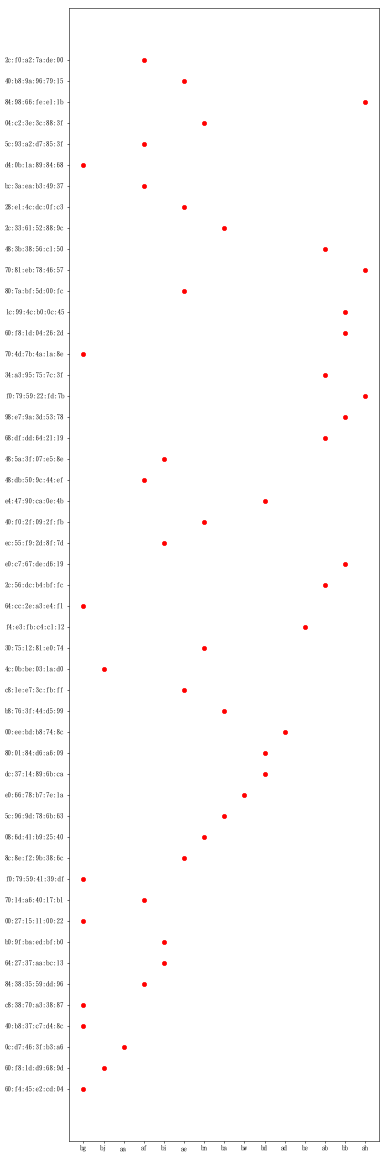

In [8]:

# plt(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# percentile_list.plot(kind='line',figsize=(20,5))
plt.plot(list_loc[:50], real_user[:50], 'ro')

# plt.axis([0, 6, 0, 20])
# plt(figsize=(20, 5))
plt.show()

In [9]:
list_dep = list()
list_dep = list(set(list_loc))
list_dep

['aa',
 'be',
 'ah',
 'bg',
 'ab',
 'bw',
 'bj',
 'ae',
 'bm',
 'bd',
 'bb',
 'bi',
 'af',
 'bn',
 'ad',
 'ba',
 'zk',
 'ac',
 'bc']

In [10]:
list_count = list()
for list_dep_index in range(len(list_dep)):
    list_count.append(list_loc.count(list_dep[list_dep_index]))
list_count

[186,
 237,
 654,
 638,
 485,
 63,
 128,
 334,
 127,
 191,
 241,
 192,
 771,
 307,
 488,
 425,
 38,
 22,
 29]

In [11]:
region_dict = {'行政一館':'aa', '忠勤樓':'ab', '語文大樓':'ac', '人言大樓':'ad', '理學院':'ae', '資訊電機館':'af',
               '商學院':'ah', '行政二館':'ba', '工學館':'bb', '建築館':'bc', '土水館':'bd', '圖書館':'be', '育樂館':'bg',
               '體育器材室':'bh', '紀念館':'bi', '科航館':'bj', '體育館':'bk', '電通館':'bm', '學思樓':'bn', '人社館':'bw',
               '男生宿舍':'bdorm', '文華創意中心':'cb', '女生宿舍':'gdorm', '中科校區':'zk'}
for index in range(len(list_dep)):
    list_dep[index] = list(region_dict.keys())[list(region_dict.values()).index(list_dep[index])]


# percentile_list

list_dep


['行政一館',
 '圖書館',
 '商學院',
 '育樂館',
 '忠勤樓',
 '人社館',
 '科航館',
 '理學院',
 '電通館',
 '土水館',
 '工學館',
 '紀念館',
 '資訊電機館',
 '學思樓',
 '人言大樓',
 '行政二館',
 '中科校區',
 '語文大樓',
 '建築館']

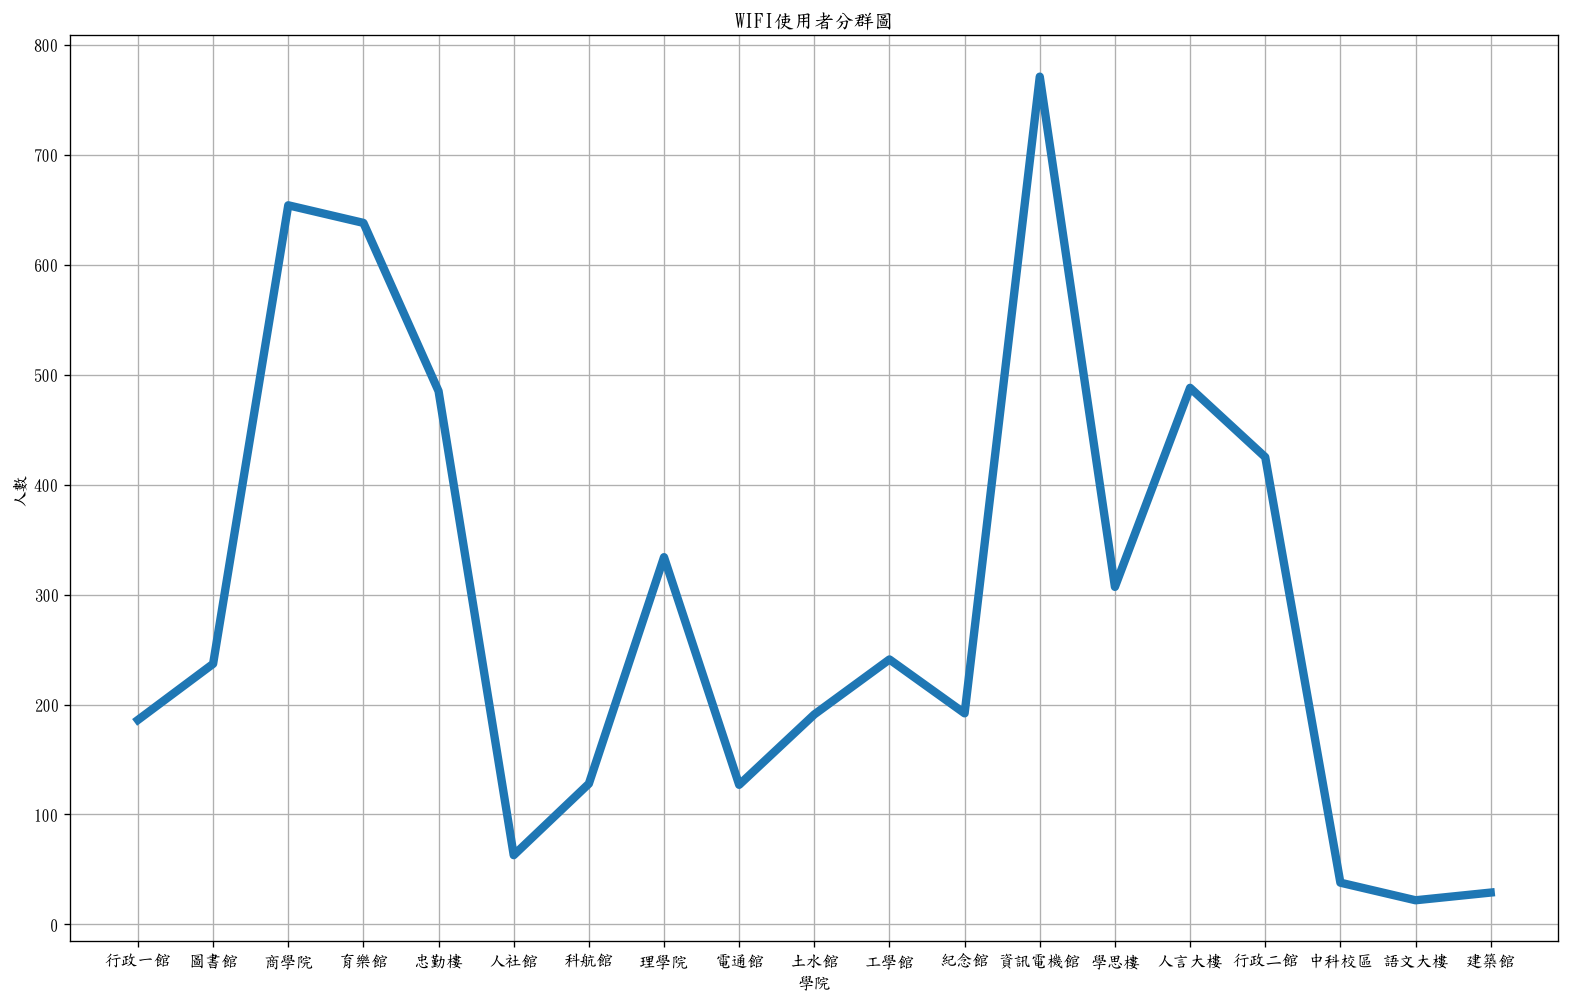

In [63]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 10), dpi=120, facecolor='w', edgecolor='k')

# line, = plt.plot(list_dep, list_count, '-')
# line.set_antialiased(False) # turn off antialising
plt.plot(list_dep, list_count, linewidth=5.0)
# plt.plot(list_dep, list_count)
plt.xlabel('學院')
plt.ylabel('人數')
plt.title('WIFI使用者分群圖')
plt.grid(True)
plt.show()